# 1. Dataset

`MNIST` is a dataset of $60,000$ grayscale images($28x28$ $pixels$) of the $10$ digits ($0-9$), along with a test set of $10,000$ images

The digits have been size-normalized and centered in a fixed-size image of $28x28$ pixels.

The MNIST (Modified National Institute of Standards and Technology) database is a large collection of handwritten digits as monochrome images. The digits have been size-normalized and centered in a fixed-size image.

The goal of this experiment is to find a set of hyperparameters that result in an accurate model and excellent model performance using GridSearchCV from Scikit-learn as a tunning technique.

Randomly I selected 3 optimizers (Adam, RMSprop, and SGD) as a starting point to develop the MLP models; later I tuned the 3 different models with their own hyperparameters and chose the model that predicted with higher accuracy the digits.

I created my own database with 20 samples and I preproced the images trying to simulate the original set to predict digits with the selected model.

In the end, the model showed high accuracy on the test set but the accuracy decreased with the custom dataset.

The problem with MNIST is that the dataset is "too perfect";  in real life, we have to deal with lights and shadows in images, variations in the way people draw a digit, noise (shapes that are not part of the actual digit), no-centered draws, and more consideration. A digit recognition model that only works on its own dataset wouldn't be that interesting but is good enough if you are new in this field and if your goal is to learn, practice, and get familiar with different machine learning tools.

## References:

1. Yefeng Xia. (August 19,2020). [From MNIST to the real-world, why the trained CNN model not works?](https://yefengxia.medium.com/from-mnist-to-the-real-world-why-the-trained-cnn-model-not-works-701fac4b73d2)

2. Engati Simply Intelligence. (January ,2021). [MNIST Dataset](https://www.engati.com/glossary/mnist-dataset)

3. Keras.io.().[MNIST digits classification dataset](https://keras.io/api/datasets/mnist/)

4. Mostafa Ibrahim. (March 13, 2024).[A Deep Dive Into Learning Curves in Machine Learning](https://wandb.ai/mostafaibrahim17/ml-articles/reports/A-Deep-Dive-Into-Learning-Curves-in-Machine-Learning--Vmlldzo0NjA1ODY0#convergence-)

5.  Jason Brownlee. (August 6, 2019). [How to use Learning Curves to Diagnose Machine Learning Model Performance](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)

# 2. Loading dataset

In [1]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# extract validation dataset
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, 
    y_train, 
    test_size=0.2, 
    random_state=42)

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a validation set of %d examples." % len(X_validation))
print("The MNIST database has a test set of %d examples." % len(X_test))


The MNIST database has a training set of 48000 examples.
The MNIST database has a validation set of 12000 examples.
The MNIST database has a test set of 10000 examples.


In [2]:
print("shape of the images:",X_train[0].shape)
print("label of the first image",y_train[0])

shape of the images: (28, 28)
label of the first image 5


# 3. Visualize dataset

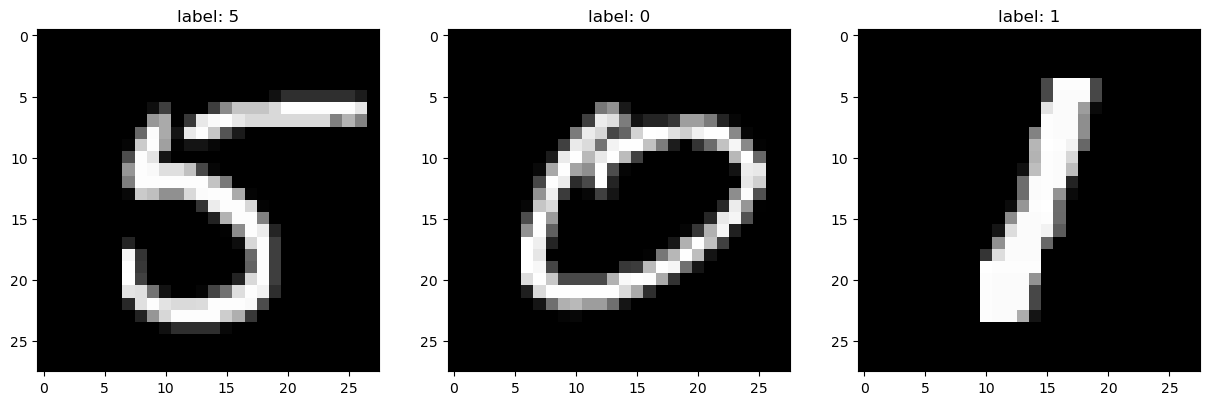

In [3]:
import matplotlib.pyplot as plt

# plot the first 3 images:
fig = plt.figure(figsize=(15,15))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title("label: "+str(y_train[i]))

In [4]:
import numpy as np
section = X_train[0][10:20,10:20]
print("image section:\n",section,"\n")
print("pixel maximum value:", np.max(X_train[0]))
print("pixel minimum value:", np.min(X_train[0]))

image section:
 [[ 21   0   0   0   0   0   0   0   0   0]
 [223 223 193  71   6   0   0   0   0   0]
 [253 253 253 253 196 121   0   0   0   0]
 [144 144 217 251 253 253 170   4   0   0]
 [  0   0   0  53 236 253 253 215   3   0]
 [  0   0   0   0  34 180 253 253 128   0]
 [  0   0   0   0   0   2 140 253 236  36]
 [  0   0   0   0   0   0  13 215 253  62]
 [  0   0   0   0   0   0   0 105 253  62]
 [  0   0   0   0   0   0   0  99 253  62]] 

pixel maximum value: 255
pixel minimum value: 0


# 4. Data preprocessing

## Normalize images:

*"When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex.
To reduce this we can normalize the values to range from 0 to 1. In this way, the numbers will be small and the computation becomes easier and faster."* **Asha Ponraj.(Feb19,2021), [A Tip A Day — Python Tip #8](https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-8-why-should-we-normalize-image-pixel-values-or-divide-by-255-4608ac5cd26a#:~:text=When%20using%20the%20image%20as,computation%20becomes%20easier%20and%20faster.)**

In [5]:
X_train = X_train/255
X_validation = X_validation/255
X_test = X_test/255

## Encode the labels:

The dataset labels are categorical variables (digits from 0 through 9). We need to encode these values before feeding them to a neural network. Since there are very few categories we can use `one-hot` encoding.

To represent a given label, `one-hot` encoding creates a vector of length equal to the total number of categories (in this case 10), Then, in order to represent a given label, the corresponding element of the encoding vector is set to 1, and all other elements to 0 (for example [0 0 0 0 0 1 0 0 0 0] is iqual to 5)

In [6]:
from keras.utils.np_utils import to_categorical

print ("integer representation of first 5 labels:\n",y_train[0:5])

y_train = to_categorical(y_train,10)
y_validation = to_categorical(y_validation,10)
y_test = to_categorical(y_test,10)

print("one-hot representation of first 5 labels:\n",y_train[0:5])

integer representation of first 5 labels:
 [5 0 1 6 1]
one-hot representation of first 5 labels:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# 5. Model Architecture

## Requeriments:

`scikeras` makes it possible to use `keras` with `scikit learn`. In this particular case, I'm going to use `GridSearchCV` from `scikit learn` for model tuning and return the hyperparameters that adjust the most to the neural network model.

if you already have Keras and TensorFlow, install `scikeras` with no dependencies:

```bash
pip install --no-deps scikeras
```

Documentation available at: https://adriangb.com/scikeras/stable/index.html

## Reproducibility:

In a reproducible model, the weights of the model should be initialized with same values in subsequent runs, for experimentation purposes or to debug a problem.

More about reproducibility in keras:

- [Reproducibility in Keras Models](https://keras.io/examples/keras_recipes/reproducibility_recipes/)

- [Layer weight initializers](https://keras.io/api/layers/initializers/)

## Design: 

In [7]:
# To use CPU/GPU in training process
import tensorflow as tf

# Data analysis
import pandas as pd

# Neural network 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Optimizers
from keras.optimizers import Adam, SGD, RMSprop

# Grid Search
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Prevent overfitting in training process for epochs > 2
from keras.callbacks import EarlyStopping

# Save the best weights in a checkpoint file 
from keras.callbacks import ModelCheckpoint 

In [8]:
# reproducibility

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# to control randomness
keras.utils.set_random_seed(42)

# control randomness, used with RELU activation function
he = keras.initializers.he_normal(seed=42)

# control randomness, used with softmax activation function
glorot = keras.initializers.glorot_normal(seed=42)

# control randomness, used with bias 
zeros = keras.initializers.zeros()
ones = keras.initializers.ones()

Every pixel in an image will be treated as the input of the Multilayer perceptron (MLP) model; the output or the prediction is encoded with one-hot algorithm and return a single array of lenght 10, where the position with the highest value represent the predicted digit.

In [9]:
def model(unitsHL1, unitsHL2, 
          dropoutHL1, dropoutHL2, 
          optimizer_learning_rate, 
          optimizer_momentum,
          optimizer='Adam'):
    model = Sequential()
    # input layer
    # flattern convert image into an array
    model.add(Flatten(input_shape=X_train.shape[1:]))
    # hidden layer 1
    model.add(Dense(unitsHL1, 
                    activation='relu', 
                    kernel_initializer=he,
                    bias_initializer=ones,
                   ))
    # regularization
    if dropoutHL1 > 0:
        model.add(Dropout(dropoutHL1))
    # hidden layer 2
    model.add(Dense(unitsHL2, 
                    activation='relu', 
                    kernel_initializer=he,
                    bias_initializer=ones,
                    ))
    # regularization
    if dropoutHL2 > 0:
        model.add(Dropout(dropoutHL2))
    # output layer
    model.add(Dense(10, 
                    activation='softmax', 
                    kernel_initializer=glorot,
                    bias_initializer=ones,
                   ))
    # optimizer
    if optimizer == 'Adam':
        opt = Adam(
            learning_rate=optimizer_learning_rate
        )
    elif optimizer == 'SGD':
        opt = SGD(
            learning_rate=optimizer_learning_rate,
            momentum=optimizer_momentum,
        )
    elif optimizer == 'RMSprop':
        opt = RMSprop(
            learning_rate=optimizer_learning_rate, 
            momentum=optimizer_momentum,
        )
    model.compile(
        loss='categorical_crossentropy', 
        optimizer = opt,
        metrics=['accuracy'],
    )
    return model

In [10]:
def model_train_results(models,epochs,batch_size,X,Y,X_val,Y_val,callbacks,verbose=0): 
    '''
    Save the history,epochs,loss and accuracy of a trained model into a dictionary
    Input: 
        - models(array):
        - epochs(array): array integer or single integer
        - batch_size(array): array integer or single integer
        - earlystopping(None): callback,
        - X,Y,X_val,Y_val(array): train and validation set
        - verbose (int) : 0,1 or 2 show training process details.
    Output:
        - results(dic):
    '''
    results = {}
    for index,model in enumerate(models):
        results[model.name] = {}
        # check for single epoch or epoch list
        if isinstance(epochs,(int,float)):
            n_epochs = epochs
        elif isinstance(epochs,list):
            n_epochs = epochs[index]
        elif len(epochs) != len(models):
            print(f"epoch missing value, {len(epochs)} values was given but need {len(models)}")
            break
        else:
            print("epoch value error")
            break
        # check for single batch size or batch size list
        if isinstance(batch_size,(int,float)):
            n_batch_size = batch_size
        elif isinstance(batch_size,list):
            n_batch_size = batch_size[index]
            
        elif len(batch_size) != len(models):
            print(f"batch size missing value,{len(batch_size)} values was given but need {len(models)}")
            break
        else:
            print("batch size value error")
            break
        # model fit with train and validation set
        results[model.name]['hist'] = model.fit(
            x = X,
            y = Y,
            batch_size = n_batch_size,
            epochs = n_epochs,
            verbose = verbose,
            callbacks=callbacks,
            validation_data=(X_val,Y_val),
            shuffle=True,
        )
        history = results[model.name]['hist']
        # stopped epochs
        if (callbacks and earlystopping.stopped_epoch > 0 ):
            stopepoch = earlystopping.stopped_epoch
            results[model.name]['stop epochs'] = stopepoch
            # validation loss and accuracy at stopped epoch
            results[model.name]['val_loss'] = history.history['val_loss'][stopepoch]
            results[model.name]['val_accuracy'] = history.history['val_accuracy'][stopepoch]
        else:
            results[model.name]['stop epochs'] = n_epochs
            # model calculate with all the epochs
            results[model.name]['val_loss'] = history.history['val_loss'][n_epochs-1]
            results[model.name]['val_accuracy'] = history.history['val_accuracy'][n_epochs-1]
    
    return results

In [11]:
def plot_train_results(results):
    '''
    input: 
        - results(dic) : model training results saved in a dictionary
                        {'model':{'key1':'result1','key2':'result2'...}}
    output
        - plot: loss(left plot), accuracy(right plot)
    '''
    n_plots = len(list(results.keys()))
    if n_plots == 1:
        fig,axes = plt.subplots(n_plots,2,figsize=(13,5))
        # Convert to 2D array
        axes = axes.reshape(1, -1)
    else:
        fig,axes = plt.subplots(n_plots,2,figsize=(13,13))
    for index,model in enumerate(list(results.keys())):
        history = results[model]['hist']
        # loss
        axes[index,0].plot(history.history['val_loss'])
        axes[index,0].plot(history.history['loss'])
        axes[index,0].set_title(model + ' loss')
        axes[index,0].set_xlabel('Epoch')
        axes[index,0].set_ylabel('Loss')
        axes[index,0].legend(['val_loss','loss'], loc='upper left')
        # accuracy
        axes[index,1].plot(history.history['val_accuracy'])
        axes[index,1].plot(history.history['accuracy'])
        axes[index,1].set_title(model + ' accuracy')
        axes[index,1].set_xlabel('Epoch')
        axes[index,1].set_ylabel('Accuracy')
        axes[index,1].legend(['val_accuracy','accuracy'], loc='upper left')
    plt.tight_layout()    
    plt.show()

## Grid search tuning

The code below was executed several times until found parameters that returned a good performance 

### Grid search : Layers and Adam optimizer

In [17]:
# patience: number of epochs with no improvement before stopping
# min: training will stop when the quantity monitored has stopped decreasing
# monitor: "val_loss" measure loss on validation set 
earlystopping = EarlyStopping(monitor = "val_loss",
                                patience = 4,
                                mode = 'auto',
                                restore_best_weights = True,
                                verbose = 1)

adam_estimator = KerasClassifier(
    model,
    unitsHL1=550,
    unitsHL2=200,
    dropoutHL1 = 0,
    dropoutHL2 = 0,
    optimizer_learning_rate=0.001,
    optimizer_momentum = 0,
    optimizer='Adam',
    callbacks= earlystopping,
    epochs=20,
)
adam_param_grid = {
    'unitsHL1':[550,750],
    'unitsHL2':[200,400],
    'optimizer_learning_rate':[0.001,0.01],
}
adam_grid = GridSearchCV(estimator=adam_estimator, param_grid=adam_param_grid)

In [18]:
with tf.device('GPU:0'):
    adam_grid_result = adam_grid.fit(
        X= X_train, 
        y= y_train,
        validation_data=(X_validation,y_validation),
        verbose=1,
    )

Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2981 - accuracy: 0.9121 - val_loss: 0.1494 - val_accuracy: 0.9563
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1220 - accuracy: 0.9631 - val_loss: 0.1314 - val_accuracy: 0.9603
Epoch 3/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0808 - accuracy: 0.9744 - val_loss: 0.1037 - val_accuracy: 0.9676
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0548 - accuracy: 0.9822 - val_loss: 0.0969 - val_accuracy: 0.9724
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0433 - accuracy: 0.9852 - val_loss: 0.1010 - val_accuracy: 0.9714
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0354 - accuracy: 0.9882 - val_loss: 0.0863 - val_accuracy: 0.9754
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0282 - accuracy: 0.9905 - val_loss: 0.1330 - val_accuracy:

1200/1200 [==============================] - 3s 3ms/step - loss: 0.0800 - accuracy: 0.9740 - val_loss: 0.1098 - val_accuracy: 0.9648
Epoch 4/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0567 - accuracy: 0.9814 - val_loss: 0.0927 - val_accuracy: 0.9720
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0446 - accuracy: 0.9854 - val_loss: 0.0934 - val_accuracy: 0.9748
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0977 - val_accuracy: 0.9752
Epoch 7/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0303 - accuracy: 0.9894 - val_loss: 0.1305 - val_accuracy: 0.9691
Epoch 8/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.1180 - val_accuracy: 0.9720
Epoch 8: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step 

1200/1200 [==============================] - 3s 3ms/step - loss: 0.0299 - accuracy: 0.9897 - val_loss: 0.1222 - val_accuracy: 0.9710
Epoch 7: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3038 - accuracy: 0.9106 - val_loss: 0.1541 - val_accuracy: 0.9531
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1163 - accuracy: 0.9637 - val_loss: 0.1210 - val_accuracy: 0.9626
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0740 - accuracy: 0.9760 - val_loss: 0.1052 - val_accuracy: 0.9695
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0574 - accuracy: 0.9802 - val_loss: 0.1027 - val_accuracy: 0.9709
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.1016 - val_accuracy: 0.9728
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step 

1200/1200 [==============================] - 4s 3ms/step - loss: 0.1418 - accuracy: 0.9635 - val_loss: 0.2302 - val_accuracy: 0.9503
Epoch 8: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.4384 - accuracy: 0.8970 - val_loss: 0.2229 - val_accuracy: 0.9380
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2203 - accuracy: 0.9386 - val_loss: 0.2267 - val_accuracy: 0.9417
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2015 - accuracy: 0.9461 - val_loss: 0.2658 - val_accuracy: 0.9293
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1918 - accuracy: 0.9492 - val_loss: 0.2012 - val_accuracy: 0.9468
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1711 - accuracy: 0.9539 - val_loss: 0.2259 - val_accuracy: 0.9470
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step 

1200/1200 [==============================] - 4s 3ms/step - loss: 0.1742 - accuracy: 0.9529 - val_loss: 0.2317 - val_accuracy: 0.9517
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1588 - accuracy: 0.9580 - val_loss: 0.2327 - val_accuracy: 0.9496
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1517 - accuracy: 0.9602 - val_loss: 0.2381 - val_accuracy: 0.9510
Epoch 7: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.5268 - accuracy: 0.8886 - val_loss: 0.2405 - val_accuracy: 0.9306
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2393 - accuracy: 0.9300 - val_loss: 0.2778 - val_accuracy: 0.9195
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2185 - accuracy: 0.9379 - val_loss: 0.2480 - val_accuracy: 0.9315
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step 

In [19]:
print("Best score: %f using %s" % (adam_grid_result.best_score_, adam_grid_result.best_params_))

Best score: 0.974958 using {'optimizer_learning_rate': 0.001, 'unitsHL1': 750, 'unitsHL2': 200}


### Grid search : Layers and RMSprop optimizer

In [10]:
# patience: number of epochs with no improvement before stopping
# min: training will stop when the quantity monitored has stopped decreasing
# monitor: "val_loss" measure loss on validation set 
earlystopping = EarlyStopping(monitor = "val_loss",
                                patience = 5,
                                mode = 'auto',
                                restore_best_weights = True,
                                verbose = 1)

RMSprop_estimator = KerasClassifier(
    model,
    unitsHL1=550,
    unitsHL2=200,
    dropoutHL1 = 0,
    dropoutHL2 = 0,
    optimizer_learning_rate=0.001,
    optimizer_momentum = 0.0,
    optimizer='RMSprop',
    callbacks= earlystopping,
    epochs=20,
)
RMSprop_param_grid = {
    'unitsHL1':[550,750,850],
    'unitsHL2':[200,400],
    'optimizer_learning_rate':[0.001,0.01,0.1],
    'optimizer_momentum':[0.0,0.001,0.01,0.1],
    
}
RMSprop_grid = GridSearchCV(
    estimator=RMSprop_estimator, 
    param_grid=RMSprop_param_grid
)

with tf.device('GPU:0'):
    RMSprop_grid_result = RMSprop_grid.fit(
        X= X_train, 
        y= y_train,
        validation_data=(X_validation,y_validation),
        verbose=1,
    )

Epoch 1/20
1200/1200 [==============================] - 7s 6ms/step - loss: 0.2981 - accuracy: 0.9121 - val_loss: 0.1494 - val_accuracy: 0.9563
Epoch 2/20
1200/1200 [==============================] - 8s 6ms/step - loss: 0.1220 - accuracy: 0.9631 - val_loss: 0.1314 - val_accuracy: 0.9603
Epoch 3/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0808 - accuracy: 0.9744 - val_loss: 0.1037 - val_accuracy: 0.9676
Epoch 4/20
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0548 - accuracy: 0.9822 - val_loss: 0.0969 - val_accuracy: 0.9724
Epoch 5/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0433 - accuracy: 0.9852 - val_loss: 0.1010 - val_accuracy: 0.9714
Epoch 6/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0354 - accuracy: 0.9882 - val_loss: 0.0863 - val_accuracy: 0.9754
Epoch 7/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0282 - accuracy: 0.9905 - val_loss: 0.1330 - val_accuracy:

1200/1200 [==============================] - 8s 7ms/step - loss: 0.0450 - accuracy: 0.9851 - val_loss: 0.1017 - val_accuracy: 0.9703
Epoch 6/20
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.1405 - val_accuracy: 0.9663
Epoch 7/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0295 - accuracy: 0.9902 - val_loss: 0.1070 - val_accuracy: 0.9722
Epoch 8/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.1018 - val_accuracy: 0.9756
Epoch 8: early stopping
300/300 [==============================] - 1s 2ms/step
Epoch 1/20
1200/1200 [==============================] - 9s 7ms/step - loss: 0.2961 - accuracy: 0.9114 - val_loss: 0.1522 - val_accuracy: 0.9542
Epoch 2/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.1181 - accuracy: 0.9639 - val_loss: 0.1265 - val_accuracy: 0.9624
Epoch 3/20
1200/1200 [==============================] - 8s 7ms/step 

1200/1200 [==============================] - 4s 3ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.1228 - val_accuracy: 0.9783
Epoch 13: early stopping
300/300 [==============================] - 1s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 3ms/step - loss: 0.3143 - accuracy: 0.9104 - val_loss: 0.1385 - val_accuracy: 0.9595
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1170 - accuracy: 0.9642 - val_loss: 0.1636 - val_accuracy: 0.9470
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0755 - accuracy: 0.9762 - val_loss: 0.0988 - val_accuracy: 0.9694
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0602 - accuracy: 0.9807 - val_loss: 0.0985 - val_accuracy: 0.9711
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.1199 - val_accuracy: 0.9668
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step

1200/1200 [==============================] - 4s 3ms/step - loss: 0.0366 - accuracy: 0.9876 - val_loss: 0.0993 - val_accuracy: 0.9737
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0282 - accuracy: 0.9904 - val_loss: 0.0996 - val_accuracy: 0.9758
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.1100 - val_accuracy: 0.9752
Epoch 9/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.1189 - val_accuracy: 0.9751
Epoch 10/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.1092 - val_accuracy: 0.9787
Epoch 10: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3195 - accuracy: 0.9089 - val_loss: 0.1418 - val_accuracy: 0.9577
Epoch 2/20
1200/1200 [==============================] - 4s 4ms/ste

1200/1200 [==============================] - 4s 4ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.1354 - val_accuracy: 0.9724
Epoch 11/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.1122 - val_accuracy: 0.9766
Epoch 12/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.1265 - val_accuracy: 0.9772
Epoch 12: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3050 - accuracy: 0.9110 - val_loss: 0.1524 - val_accuracy: 0.9532
Epoch 2/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1179 - accuracy: 0.9635 - val_loss: 0.1795 - val_accuracy: 0.9427
Epoch 3/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0800 - accuracy: 0.9748 - val_loss: 0.1161 - val_accuracy: 0.9655
Epoch 4/20
1200/1200 [==============================] - 4s 4ms/st

1200/1200 [==============================] - 4s 3ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.1010 - val_accuracy: 0.9741
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0926 - val_accuracy: 0.9764
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0959 - val_accuracy: 0.9766
Epoch 9/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.1385 - val_accuracy: 0.9700
Epoch 10/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.1227 - val_accuracy: 0.9774
Epoch 11/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.1496 - val_accuracy: 0.9700
Epoch 12/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.1370 - val_accuracy: 0.9766


Epoch 10: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2979 - accuracy: 0.9102 - val_loss: 0.1445 - val_accuracy: 0.9565
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1210 - accuracy: 0.9635 - val_loss: 0.1336 - val_accuracy: 0.9578
Epoch 3/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0803 - accuracy: 0.9750 - val_loss: 0.1091 - val_accuracy: 0.9674
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0580 - accuracy: 0.9802 - val_loss: 0.1132 - val_accuracy: 0.9670
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0420 - accuracy: 0.9859 - val_loss: 0.0853 - val_accuracy: 0.9768
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.1058 - val_accuracy: 0.9731
Epoch 7/20
1200/1200 [==============================] - 

300/300 [==============================] - 1s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3058 - accuracy: 0.9098 - val_loss: 0.1440 - val_accuracy: 0.9548
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1170 - accuracy: 0.9643 - val_loss: 0.1452 - val_accuracy: 0.9553
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0767 - accuracy: 0.9755 - val_loss: 0.1173 - val_accuracy: 0.9651
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.1347 - val_accuracy: 0.9632
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0416 - accuracy: 0.9855 - val_loss: 0.0998 - val_accuracy: 0.9737
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.1148 - val_accuracy: 0.9724
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.026

1200/1200 [==============================] - 4s 4ms/step - loss: 0.0762 - accuracy: 0.9757 - val_loss: 0.1144 - val_accuracy: 0.9657
Epoch 4/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0538 - accuracy: 0.9813 - val_loss: 0.1037 - val_accuracy: 0.9701
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0407 - accuracy: 0.9859 - val_loss: 0.1018 - val_accuracy: 0.9728
Epoch 6/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0377 - accuracy: 0.9877 - val_loss: 0.1004 - val_accuracy: 0.9753
Epoch 7/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0283 - accuracy: 0.9907 - val_loss: 0.1194 - val_accuracy: 0.9722
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0247 - accuracy: 0.9916 - val_loss: 0.1134 - val_accuracy: 0.9758
Epoch 9/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0237 - accuracy: 0.9919 - val_loss: 0.1397 - val_accuracy: 0.9720
Epo

Epoch 10: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2924 - accuracy: 0.9121 - val_loss: 0.1479 - val_accuracy: 0.9545
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1181 - accuracy: 0.9637 - val_loss: 0.1155 - val_accuracy: 0.9651
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0764 - accuracy: 0.9744 - val_loss: 0.1070 - val_accuracy: 0.9668
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0527 - accuracy: 0.9830 - val_loss: 0.1138 - val_accuracy: 0.9688
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.0911 - val_accuracy: 0.9762
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0354 - accuracy: 0.9883 - val_loss: 0.1225 - val_accuracy: 0.9686
Epoch 7/20
1200/1200 [==============================] - 

1200/1200 [==============================] - 4s 3ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.1035 - val_accuracy: 0.9763
Epoch 8: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3038 - accuracy: 0.9106 - val_loss: 0.1541 - val_accuracy: 0.9531
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1163 - accuracy: 0.9637 - val_loss: 0.1210 - val_accuracy: 0.9626
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0740 - accuracy: 0.9760 - val_loss: 0.1052 - val_accuracy: 0.9695
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0574 - accuracy: 0.9802 - val_loss: 0.1027 - val_accuracy: 0.9709
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.1016 - val_accuracy: 0.9728
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step 

1200/1200 [==============================] - 4s 3ms/step - loss: 0.0770 - accuracy: 0.9748 - val_loss: 0.1010 - val_accuracy: 0.9691
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0512 - accuracy: 0.9834 - val_loss: 0.0951 - val_accuracy: 0.9732
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0428 - accuracy: 0.9860 - val_loss: 0.1043 - val_accuracy: 0.9744
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.1063 - val_accuracy: 0.9743
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0282 - accuracy: 0.9905 - val_loss: 0.1081 - val_accuracy: 0.9755
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.1081 - val_accuracy: 0.9758
Epoch 9/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.1388 - val_accuracy: 0.9714
Epo

1200/1200 [==============================] - 4s 3ms/step - loss: 0.0796 - accuracy: 0.9750 - val_loss: 0.0995 - val_accuracy: 0.9703
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.1062 - val_accuracy: 0.9691
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.1013 - val_accuracy: 0.9732
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0348 - accuracy: 0.9881 - val_loss: 0.1182 - val_accuracy: 0.9705
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.1096 - val_accuracy: 0.9725
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0257 - accuracy: 0.9911 - val_loss: 0.1099 - val_accuracy: 0.9745
Epoch 8: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step 

Epoch 9: early stopping
300/300 [==============================] - 1s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3039 - accuracy: 0.9093 - val_loss: 0.1404 - val_accuracy: 0.9595
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1185 - accuracy: 0.9642 - val_loss: 0.1659 - val_accuracy: 0.9469
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0773 - accuracy: 0.9763 - val_loss: 0.0917 - val_accuracy: 0.9718
Epoch 4/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0576 - accuracy: 0.9817 - val_loss: 0.1077 - val_accuracy: 0.9694
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0428 - accuracy: 0.9853 - val_loss: 0.1032 - val_accuracy: 0.9729
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0376 - accuracy: 0.9875 - val_loss: 0.0888 - val_accuracy: 0.9755
Epoch 7/20
1200/1200 [==============================] - 4

1200/1200 [==============================] - 4s 4ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.1414 - val_accuracy: 0.9727
Epoch 11/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.1320 - val_accuracy: 0.9756
Epoch 12/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.1268 - val_accuracy: 0.9775
Epoch 13/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.1228 - val_accuracy: 0.9783
Epoch 13: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3143 - accuracy: 0.9104 - val_loss: 0.1385 - val_accuracy: 0.9595
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1170 - accuracy: 0.9642 - val_loss: 0.1636 - val_accuracy: 0.9470
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/s

1200/1200 [==============================] - 4s 3ms/step - loss: 0.0769 - accuracy: 0.9752 - val_loss: 0.1157 - val_accuracy: 0.9656
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0536 - accuracy: 0.9828 - val_loss: 0.1241 - val_accuracy: 0.9674
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0435 - accuracy: 0.9860 - val_loss: 0.0939 - val_accuracy: 0.9747
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0366 - accuracy: 0.9876 - val_loss: 0.0993 - val_accuracy: 0.9737
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0282 - accuracy: 0.9904 - val_loss: 0.0996 - val_accuracy: 0.9758
Epoch 8/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.1100 - val_accuracy: 0.9752
Epoch 9/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.1189 - val_accuracy: 0.9751
Epo

1200/1200 [==============================] - 4s 4ms/step - loss: 0.1550 - accuracy: 0.9620 - val_loss: 0.2132 - val_accuracy: 0.9507
Epoch 9: early stopping
300/300 [==============================] - 1s 2ms/step
Epoch 1/20
1200/1200 [==============================] - 6s 4ms/step - loss: 0.4598 - accuracy: 0.8938 - val_loss: 0.2612 - val_accuracy: 0.9288
Epoch 2/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2194 - accuracy: 0.9393 - val_loss: 0.2887 - val_accuracy: 0.9164
Epoch 3/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1988 - accuracy: 0.9444 - val_loss: 0.2388 - val_accuracy: 0.9378
Epoch 4/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1854 - accuracy: 0.9495 - val_loss: 0.2109 - val_accuracy: 0.9490
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1666 - accuracy: 0.9544 - val_loss: 0.2328 - val_accuracy: 0.9468
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step 

1200/1200 [==============================] - 5s 4ms/step - loss: 0.4744 - accuracy: 0.8952 - val_loss: 0.2387 - val_accuracy: 0.9295
Epoch 2/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2240 - accuracy: 0.9367 - val_loss: 0.2321 - val_accuracy: 0.9379
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1931 - accuracy: 0.9472 - val_loss: 0.1842 - val_accuracy: 0.9498
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1796 - accuracy: 0.9512 - val_loss: 0.2538 - val_accuracy: 0.9381
Epoch 5/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1742 - accuracy: 0.9529 - val_loss: 0.2317 - val_accuracy: 0.9517
Epoch 6/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1588 - accuracy: 0.9580 - val_loss: 0.2327 - val_accuracy: 0.9496
Epoch 7/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1517 - accuracy: 0.9602 - val_loss: 0.2381 - val_accuracy: 0.9510
Epo

1200/1200 [==============================] - 4s 3ms/step - loss: 0.0989 - accuracy: 0.9756 - val_loss: 0.2487 - val_accuracy: 0.9513
Epoch 13: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4027 - accuracy: 0.9059 - val_loss: 0.2252 - val_accuracy: 0.9392
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2030 - accuracy: 0.9443 - val_loss: 0.1705 - val_accuracy: 0.9509
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1751 - accuracy: 0.9536 - val_loss: 0.2058 - val_accuracy: 0.9449
Epoch 4/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1607 - accuracy: 0.9554 - val_loss: 0.3140 - val_accuracy: 0.9336
Epoch 5/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1512 - accuracy: 0.9593 - val_loss: 0.2131 - val_accuracy: 0.9561
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step

1200/1200 [==============================] - 4s 3ms/step - loss: 0.1561 - accuracy: 0.9580 - val_loss: 0.2284 - val_accuracy: 0.9495
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1522 - accuracy: 0.9613 - val_loss: 0.2077 - val_accuracy: 0.9490
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1314 - accuracy: 0.9654 - val_loss: 0.1833 - val_accuracy: 0.9569
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1319 - accuracy: 0.9671 - val_loss: 0.1686 - val_accuracy: 0.9637
Epoch 9/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1288 - accuracy: 0.9682 - val_loss: 0.2496 - val_accuracy: 0.9530
Epoch 10/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1306 - accuracy: 0.9679 - val_loss: 0.2077 - val_accuracy: 0.9553
Epoch 11/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1187 - accuracy: 0.9717 - val_loss: 0.2272 - val_accuracy: 0.9533
E

1200/1200 [==============================] - 5s 4ms/step - loss: 0.3781 - accuracy: 0.9100 - val_loss: 0.2090 - val_accuracy: 0.9389
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2045 - accuracy: 0.9433 - val_loss: 0.2284 - val_accuracy: 0.9337
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1694 - accuracy: 0.9539 - val_loss: 0.1895 - val_accuracy: 0.9487
Epoch 4/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1582 - accuracy: 0.9572 - val_loss: 0.2150 - val_accuracy: 0.9485
Epoch 5/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1417 - accuracy: 0.9617 - val_loss: 0.2038 - val_accuracy: 0.9538
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1381 - accuracy: 0.9649 - val_loss: 0.1998 - val_accuracy: 0.9561
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1304 - accuracy: 0.9660 - val_loss: 0.1811 - val_accuracy: 0.9597
Epo

1200/1200 [==============================] - 4s 3ms/step - loss: 0.1370 - accuracy: 0.9644 - val_loss: 0.1999 - val_accuracy: 0.9607
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1342 - accuracy: 0.9646 - val_loss: 0.2109 - val_accuracy: 0.9535
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1374 - accuracy: 0.9653 - val_loss: 0.1949 - val_accuracy: 0.9580
Epoch 9/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1329 - accuracy: 0.9678 - val_loss: 0.2164 - val_accuracy: 0.9590
Epoch 10/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1129 - accuracy: 0.9719 - val_loss: 0.2091 - val_accuracy: 0.9567
Epoch 11/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1100 - accuracy: 0.9735 - val_loss: 0.2754 - val_accuracy: 0.9514
Epoch 12/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1136 - accuracy: 0.9731 - val_loss: 0.2118 - val_accuracy: 0.9578


1200/1200 [==============================] - 4s 3ms/step - loss: 0.1524 - accuracy: 0.9592 - val_loss: 0.2775 - val_accuracy: 0.9477
Epoch 6/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1504 - accuracy: 0.9615 - val_loss: 0.2307 - val_accuracy: 0.9488
Epoch 6: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3991 - accuracy: 0.9028 - val_loss: 0.2304 - val_accuracy: 0.9333
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2011 - accuracy: 0.9430 - val_loss: 0.2267 - val_accuracy: 0.9348
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1822 - accuracy: 0.9507 - val_loss: 0.1943 - val_accuracy: 0.9437
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1634 - accuracy: 0.9567 - val_loss: 0.2158 - val_accuracy: 0.9525
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step 

1200/1200 [==============================] - 4s 3ms/step - loss: 0.1678 - accuracy: 0.9555 - val_loss: 0.1801 - val_accuracy: 0.9538
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1405 - accuracy: 0.9632 - val_loss: 0.2180 - val_accuracy: 0.9572
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1374 - accuracy: 0.9644 - val_loss: 0.2449 - val_accuracy: 0.9484
Epoch 7/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1395 - accuracy: 0.9649 - val_loss: 0.2065 - val_accuracy: 0.9529
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1274 - accuracy: 0.9684 - val_loss: 0.2191 - val_accuracy: 0.9577
Epoch 9/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1223 - accuracy: 0.9696 - val_loss: 0.2368 - val_accuracy: 0.9566
Epoch 9: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step 

1200/1200 [==============================] - 4s 3ms/step - loss: 0.1279 - accuracy: 0.9674 - val_loss: 0.2056 - val_accuracy: 0.9539
Epoch 8: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3913 - accuracy: 0.9061 - val_loss: 0.2120 - val_accuracy: 0.9406
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2025 - accuracy: 0.9440 - val_loss: 0.2058 - val_accuracy: 0.9435
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1841 - accuracy: 0.9509 - val_loss: 0.2333 - val_accuracy: 0.9403
Epoch 4/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1636 - accuracy: 0.9566 - val_loss: 0.2396 - val_accuracy: 0.9458
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1467 - accuracy: 0.9614 - val_loss: 0.2179 - val_accuracy: 0.9500
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step 

1200/1200 [==============================] - 3s 3ms/step - loss: 0.1069 - accuracy: 0.9741 - val_loss: 0.1925 - val_accuracy: 0.9617
Epoch 12/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0985 - accuracy: 0.9761 - val_loss: 0.2213 - val_accuracy: 0.9613
Epoch 12: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3933 - accuracy: 0.9054 - val_loss: 0.2036 - val_accuracy: 0.9412
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2034 - accuracy: 0.9422 - val_loss: 0.2575 - val_accuracy: 0.9344
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1845 - accuracy: 0.9493 - val_loss: 0.2521 - val_accuracy: 0.9334
Epoch 4/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1684 - accuracy: 0.9551 - val_loss: 0.2109 - val_accuracy: 0.9500
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/ste

1200/1200 [==============================] - 4s 3ms/step - loss: 0.1251 - accuracy: 0.9695 - val_loss: 0.2522 - val_accuracy: 0.9523
Epoch 11/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1057 - accuracy: 0.9729 - val_loss: 0.2223 - val_accuracy: 0.9582
Epoch 12/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1091 - accuracy: 0.9735 - val_loss: 0.2083 - val_accuracy: 0.9547
Epoch 12: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3759 - accuracy: 0.9077 - val_loss: 0.2688 - val_accuracy: 0.9301
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2073 - accuracy: 0.9442 - val_loss: 0.1921 - val_accuracy: 0.9456
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1668 - accuracy: 0.9548 - val_loss: 0.1921 - val_accuracy: 0.9494
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/st

1200/1200 [==============================] - 4s 3ms/step - loss: 0.3752 - accuracy: 0.9087 - val_loss: 0.2249 - val_accuracy: 0.9385
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1985 - accuracy: 0.9447 - val_loss: 0.2436 - val_accuracy: 0.9388
Epoch 3/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1734 - accuracy: 0.9528 - val_loss: 0.1856 - val_accuracy: 0.9504
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1553 - accuracy: 0.9593 - val_loss: 0.2109 - val_accuracy: 0.9503
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1431 - accuracy: 0.9628 - val_loss: 0.2013 - val_accuracy: 0.9492
Epoch 6/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1414 - accuracy: 0.9639 - val_loss: 0.2265 - val_accuracy: 0.9482
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1381 - accuracy: 0.9648 - val_loss: 0.1950 - val_accuracy: 0.9592
Epo

1200/1200 [==============================] - 4s 3ms/step - loss: 2.3135 - accuracy: 0.1045 - val_loss: 2.3140 - val_accuracy: 0.0967
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3129 - accuracy: 0.1022 - val_loss: 2.3215 - val_accuracy: 0.1016
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3147 - accuracy: 0.1005 - val_loss: 2.3099 - val_accuracy: 0.0967
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3150 - accuracy: 0.1029 - val_loss: 2.3206 - val_accuracy: 0.0967
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3147 - accuracy: 0.1023 - val_loss: 2.3183 - val_accuracy: 0.0979
Epoch 8: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 3.9674 - accuracy: 0.1047 - val_loss: 2.3260 - val_accuracy: 0.0978
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step 

1200/1200 [==============================] - 4s 4ms/step - loss: 2.3136 - accuracy: 0.1039 - val_loss: 2.3226 - val_accuracy: 0.0981
Epoch 11/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3144 - accuracy: 0.1036 - val_loss: 2.3053 - val_accuracy: 0.1102
Epoch 12/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3139 - accuracy: 0.1008 - val_loss: 2.3100 - val_accuracy: 0.0980
Epoch 13/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3132 - accuracy: 0.1048 - val_loss: 2.3125 - val_accuracy: 0.1016
Epoch 14/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3146 - accuracy: 0.1019 - val_loss: 2.3198 - val_accuracy: 0.1016
Epoch 15/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3138 - accuracy: 0.1051 - val_loss: 2.3105 - val_accuracy: 0.1082
Epoch 16/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3137 - accuracy: 0.1005 - val_loss: 2.3122 - val_accuracy: 0.09

1200/1200 [==============================] - 4s 3ms/step - loss: 4.4064 - accuracy: 0.1639 - val_loss: 2.0403 - val_accuracy: 0.1985
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.0210 - accuracy: 0.2018 - val_loss: 2.0089 - val_accuracy: 0.2057
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.0123 - accuracy: 0.2032 - val_loss: 2.0115 - val_accuracy: 0.2088
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.0089 - accuracy: 0.2093 - val_loss: 2.0474 - val_accuracy: 0.2006
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.0047 - accuracy: 0.2059 - val_loss: 2.0302 - val_accuracy: 0.2023
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.0191 - accuracy: 0.2023 - val_loss: 2.0215 - val_accuracy: 0.1992
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.0278 - accuracy: 0.2026 - val_loss: 2.0147 - val_accuracy: 0.2007
Epo

1200/1200 [==============================] - 4s 3ms/step - loss: 2.3132 - accuracy: 0.1029 - val_loss: 2.3127 - val_accuracy: 0.1082
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3147 - accuracy: 0.1005 - val_loss: 2.3086 - val_accuracy: 0.0967
Epoch 8/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3143 - accuracy: 0.1031 - val_loss: 2.3156 - val_accuracy: 0.0980
Epoch 8: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 3.9959 - accuracy: 0.1019 - val_loss: 2.3143 - val_accuracy: 0.0978
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3143 - accuracy: 0.1011 - val_loss: 2.3072 - val_accuracy: 0.1102
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3148 - accuracy: 0.1017 - val_loss: 2.3152 - val_accuracy: 0.1082
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step 

1200/1200 [==============================] - 3s 3ms/step - loss: 2.0047 - accuracy: 0.2090 - val_loss: 2.0142 - val_accuracy: 0.2001
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.1005 - accuracy: 0.1809 - val_loss: 2.3240 - val_accuracy: 0.1016
Epoch 6/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3150 - accuracy: 0.1015 - val_loss: 2.3118 - val_accuracy: 0.0967
Epoch 7/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3151 - accuracy: 0.1030 - val_loss: 2.3226 - val_accuracy: 0.0967
Epoch 8/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3147 - accuracy: 0.1024 - val_loss: 2.3203 - val_accuracy: 0.0978
Epoch 8: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 3.9379 - accuracy: 0.2077 - val_loss: 2.0524 - val_accuracy: 0.2037
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step 

1200/1200 [==============================] - 3s 3ms/step - loss: 1.9956 - accuracy: 0.2103 - val_loss: 1.9912 - val_accuracy: 0.2233
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0115 - accuracy: 0.2085 - val_loss: 2.0192 - val_accuracy: 0.2070
Epoch 6/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0117 - accuracy: 0.2070 - val_loss: 2.0075 - val_accuracy: 0.2113
Epoch 7/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0153 - accuracy: 0.2078 - val_loss: 2.0239 - val_accuracy: 0.1943
Epoch 8/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0108 - accuracy: 0.2063 - val_loss: 2.0449 - val_accuracy: 0.1972
Epoch 9/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.2103 - accuracy: 0.1445 - val_loss: 2.3181 - val_accuracy: 0.0978
Epoch 9: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step 

Epoch 14: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 4.8345 - accuracy: 0.1710 - val_loss: 2.2283 - val_accuracy: 0.1992
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0093 - accuracy: 0.2102 - val_loss: 1.9447 - val_accuracy: 0.2041
Epoch 3/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.9476 - accuracy: 0.1923 - val_loss: 1.9043 - val_accuracy: 0.1960
Epoch 4/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.9287 - accuracy: 0.1897 - val_loss: 1.9263 - val_accuracy: 0.1930
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.9438 - accuracy: 0.1912 - val_loss: 1.8839 - val_accuracy: 0.1968
Epoch 6/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.8972 - accuracy: 0.1858 - val_loss: 1.8643 - val_accuracy: 0.1952
Epoch 7/20
1200/1200 [==============================] - 

1200/1200 [==============================] - 3s 3ms/step - loss: 2.3135 - accuracy: 0.1029 - val_loss: 2.3125 - val_accuracy: 0.0981
Epoch 6/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3142 - accuracy: 0.1026 - val_loss: 2.3136 - val_accuracy: 0.1082
Epoch 7/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3146 - accuracy: 0.1001 - val_loss: 2.3113 - val_accuracy: 0.0981
Epoch 8/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3132 - accuracy: 0.1020 - val_loss: 2.3041 - val_accuracy: 0.0997
Epoch 9/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3142 - accuracy: 0.1025 - val_loss: 2.3158 - val_accuracy: 0.0983
Epoch 10/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3147 - accuracy: 0.1043 - val_loss: 2.3250 - val_accuracy: 0.0979
Epoch 11/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3144 - accuracy: 0.1010 - val_loss: 2.3105 - val_accuracy: 0.1016
E

Epoch 6: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 4.1311 - accuracy: 0.1194 - val_loss: 2.0675 - val_accuracy: 0.1819
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0657 - accuracy: 0.1906 - val_loss: 2.0310 - val_accuracy: 0.2023
Epoch 3/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0589 - accuracy: 0.1916 - val_loss: 2.3166 - val_accuracy: 0.1082
Epoch 4/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3140 - accuracy: 0.1028 - val_loss: 2.3070 - val_accuracy: 0.1082
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3138 - accuracy: 0.1030 - val_loss: 2.3139 - val_accuracy: 0.0978
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 2.3145 - accuracy: 0.1027 - val_loss: 2.3147 - val_accuracy: 0.1082
Epoch 7/20
1200/1200 [==============================] - 4

Epoch 6: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 4.6431 - accuracy: 0.2014 - val_loss: 2.0151 - val_accuracy: 0.2018
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0058 - accuracy: 0.2056 - val_loss: 2.0162 - val_accuracy: 0.2064
Epoch 3/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.9928 - accuracy: 0.2080 - val_loss: 1.9990 - val_accuracy: 0.2054
Epoch 4/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.9980 - accuracy: 0.2079 - val_loss: 2.0138 - val_accuracy: 0.2142
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0082 - accuracy: 0.2058 - val_loss: 2.0611 - val_accuracy: 0.2041
Epoch 6/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0047 - accuracy: 0.2041 - val_loss: 2.0518 - val_accuracy: 0.2139
Epoch 7/20
1200/1200 [==============================] - 3

Epoch 7: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 3.9759 - accuracy: 0.1911 - val_loss: 2.0848 - val_accuracy: 0.2044
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0529 - accuracy: 0.2068 - val_loss: 2.0623 - val_accuracy: 0.2042
Epoch 3/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0733 - accuracy: 0.2015 - val_loss: 2.0538 - val_accuracy: 0.2009
Epoch 4/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0909 - accuracy: 0.2024 - val_loss: 2.1011 - val_accuracy: 0.2047
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0716 - accuracy: 0.1993 - val_loss: 2.0792 - val_accuracy: 0.1905
Epoch 6/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.0668 - accuracy: 0.2039 - val_loss: 2.0714 - val_accuracy: 0.2012
Epoch 7/20
1200/1200 [==============================] - 3

1200/1200 [==============================] - 3s 3ms/step - loss: 1.7745 - accuracy: 0.2618 - val_loss: 1.7667 - val_accuracy: 0.2639
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 1.7911 - accuracy: 0.2540 - val_loss: 1.7382 - val_accuracy: 0.2952
Epoch 7/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.7795 - accuracy: 0.2591 - val_loss: 1.8752 - val_accuracy: 0.2148
Epoch 8/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.7794 - accuracy: 0.2596 - val_loss: 1.7822 - val_accuracy: 0.2381
Epoch 9/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.7973 - accuracy: 0.2561 - val_loss: 1.7798 - val_accuracy: 0.2520
Epoch 10/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.7740 - accuracy: 0.2630 - val_loss: 1.7762 - val_accuracy: 0.2670
Epoch 11/20
1200/1200 [==============================] - 3s 3ms/step - loss: 1.8001 - accuracy: 0.2514 - val_loss: 1.8390 - val_accuracy: 0.2349
E

1200/1200 [==============================] - 4s 3ms/step - loss: 5.5395 - accuracy: 0.1041 - val_loss: 2.3161 - val_accuracy: 0.0980
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3134 - accuracy: 0.1032 - val_loss: 2.3123 - val_accuracy: 0.0921
Epoch 3/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3143 - accuracy: 0.1011 - val_loss: 2.3111 - val_accuracy: 0.0981
Epoch 4/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3151 - accuracy: 0.1020 - val_loss: 2.3119 - val_accuracy: 0.1017
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3139 - accuracy: 0.1030 - val_loss: 2.3087 - val_accuracy: 0.1103
Epoch 6/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3146 - accuracy: 0.1005 - val_loss: 2.3229 - val_accuracy: 0.0980
Epoch 7/20
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3152 - accuracy: 0.1008 - val_loss: 2.3134 - val_accuracy: 0.0996
Epo

1200/1200 [==============================] - 3s 3ms/step - loss: 1.9192 - accuracy: 0.1966 - val_loss: 1.9237 - val_accuracy: 0.1772
Epoch 7: early stopping
300/300 [==============================] - 0s 1ms/step
Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2656 - accuracy: 0.9194 - val_loss: 0.1549 - val_accuracy: 0.9537
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1071 - accuracy: 0.9664 - val_loss: 0.0971 - val_accuracy: 0.9708
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0701 - accuracy: 0.9771 - val_loss: 0.0923 - val_accuracy: 0.9742
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0786 - val_accuracy: 0.9770
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0377 - accuracy: 0.9873 - val_loss: 0.1006 - val_accuracy: 0.9738
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step 

In [12]:
print("Best score: %f using %s" % (RMSprop_grid_result.best_score_, RMSprop_grid_result.best_params_))

Best score: 0.974958 using {'optimizer_learning_rate': 0.001, 'optimizer_momentum': 0.0, 'unitsHL1': 750, 'unitsHL2': 200}


### Grid search : Layers and SGD optimizer

In [13]:
# patience: number of epochs with no improvement before stopping
# min: training will stop when the quantity monitored has stopped decreasing
# monitor: "val_loss" measure loss on validation set 
earlystopping = EarlyStopping(monitor = "val_loss",
                                patience = 3,
                                mode = 'auto',
                                restore_best_weights = True,
                                verbose = 1)

SGD_estimator = KerasClassifier(
    model,
    unitsHL1=550,
    unitsHL2=200,
    dropoutHL1 = 0,
    dropoutHL2 = 0,
    optimizer_learning_rate=0.001,
    optimizer_momentum = 0.0,
    optimizer='SGD',
    callbacks= earlystopping,
    epochs=20,

)
SGD_param_grid = {
    'unitsHL1':[550,750,850],
    'unitsHL2':[200,400],
    'optimizer_learning_rate':[0.001,0.01,0.1],
    'optimizer_momentum':[0.0,0.001,0.01],
}
SGD_grid = GridSearchCV(
    estimator=SGD_estimator, 
    param_grid=SGD_param_grid,
    cv = 3,
)

In [14]:
with tf.device('GPU:0'):
    SGD_grid_result = SGD_grid.fit(
        X= X_train, 
        y= y_train,
        validation_data=(X_validation,y_validation),
        verbose=1,
    )

Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3254 - accuracy: 0.9012 - val_loss: 0.1737 - val_accuracy: 0.9471
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1296 - accuracy: 0.9608 - val_loss: 0.1385 - val_accuracy: 0.9584
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0857 - accuracy: 0.9707 - val_loss: 0.1007 - val_accuracy: 0.9691
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0566 - accuracy: 0.9818 - val_loss: 0.1576 - val_accuracy: 0.9564
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0488 - accuracy: 0.9828 - val_loss: 0.1046 - val_accuracy: 0.9723
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0348 - accuracy: 0.9879 - val_loss: 0.1134 - val_accuracy: 0.9715
Epoch 6: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4

1000/1000 [==============================] - 3s 3ms/step - loss: 0.0470 - accuracy: 0.9843 - val_loss: 0.1333 - val_accuracy: 0.9657
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0358 - accuracy: 0.9879 - val_loss: 0.1169 - val_accuracy: 0.9690
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 0.1013 - val_accuracy: 0.9735
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0262 - accuracy: 0.9911 - val_loss: 0.1329 - val_accuracy: 0.9691
Epoch 9/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.1242 - val_accuracy: 0.9707
Epoch 10/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.1384 - val_accuracy: 0.9715
Epoch 10: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 3s 3ms/ste

1000/1000 [==============================] - 3s 3ms/step - loss: 0.0634 - accuracy: 0.9802 - val_loss: 0.1075 - val_accuracy: 0.9703
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0445 - accuracy: 0.9853 - val_loss: 0.1066 - val_accuracy: 0.9710
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0381 - accuracy: 0.9872 - val_loss: 0.0994 - val_accuracy: 0.9720
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0312 - accuracy: 0.9897 - val_loss: 0.1110 - val_accuracy: 0.9728
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.1042 - val_accuracy: 0.9737
Epoch 9/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.1344 - val_accuracy: 0.9703
Epoch 9: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 3s 3ms/step 

500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 0.3431 - accuracy: 0.9017 - val_loss: 0.1811 - val_accuracy: 0.9440
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1293 - accuracy: 0.9603 - val_loss: 0.1164 - val_accuracy: 0.9638
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0823 - accuracy: 0.9739 - val_loss: 0.1187 - val_accuracy: 0.9643
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0648 - accuracy: 0.9787 - val_loss: 0.1066 - val_accuracy: 0.9697
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0470 - accuracy: 0.9843 - val_loss: 0.1333 - val_accuracy: 0.9657
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0358 - accuracy: 0.9879 - val_loss: 0.1169 - val_accuracy: 0.9690
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.030

Epoch 8: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3358 - accuracy: 0.9031 - val_loss: 0.1781 - val_accuracy: 0.9453
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1282 - accuracy: 0.9607 - val_loss: 0.1168 - val_accuracy: 0.9652
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0823 - accuracy: 0.9735 - val_loss: 0.1057 - val_accuracy: 0.9678
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0602 - accuracy: 0.9804 - val_loss: 0.1183 - val_accuracy: 0.9664
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0461 - accuracy: 0.9851 - val_loss: 0.1126 - val_accuracy: 0.9691
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0373 - accuracy: 0.9873 - val_loss: 0.1118 - val_accuracy: 0.9703
Epoch 6: early stopping
500/500 [========================

Epoch 1/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3349 - accuracy: 0.9012 - val_loss: 0.1808 - val_accuracy: 0.9454
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1318 - accuracy: 0.9597 - val_loss: 0.1232 - val_accuracy: 0.9632
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0843 - accuracy: 0.9733 - val_loss: 0.1053 - val_accuracy: 0.9676
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0634 - accuracy: 0.9802 - val_loss: 0.1075 - val_accuracy: 0.9703
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0445 - accuracy: 0.9853 - val_loss: 0.1066 - val_accuracy: 0.9710
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0381 - accuracy: 0.9872 - val_loss: 0.0994 - val_accuracy: 0.9720
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0312 - accuracy: 0.9897 - val_loss: 0.1110 - val_accuracy:

1000/1000 [==============================] - 3s 3ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.1147 - val_accuracy: 0.9733
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.1122 - val_accuracy: 0.9731
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0283 - accuracy: 0.9904 - val_loss: 0.1348 - val_accuracy: 0.9692
Epoch 8: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 0.3358 - accuracy: 0.9031 - val_loss: 0.1781 - val_accuracy: 0.9453
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1282 - accuracy: 0.9607 - val_loss: 0.1168 - val_accuracy: 0.9652
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0823 - accuracy: 0.9735 - val_loss: 0.1057 - val_accuracy: 0.9678
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step 

1000/1000 [==============================] - 3s 3ms/step - loss: 0.1790 - accuracy: 0.9500 - val_loss: 0.1991 - val_accuracy: 0.9473
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1590 - accuracy: 0.9566 - val_loss: 0.2451 - val_accuracy: 0.9413
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1472 - accuracy: 0.9593 - val_loss: 0.2196 - val_accuracy: 0.9480
Epoch 5: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4172 - accuracy: 0.9016 - val_loss: 0.2156 - val_accuracy: 0.9362
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2039 - accuracy: 0.9416 - val_loss: 0.2162 - val_accuracy: 0.9378
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1841 - accuracy: 0.9486 - val_loss: 0.2284 - val_accuracy: 0.9413
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step 

1000/1000 [==============================] - 3s 3ms/step - loss: 0.1535 - accuracy: 0.9589 - val_loss: 0.1856 - val_accuracy: 0.9547
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1329 - accuracy: 0.9635 - val_loss: 0.2607 - val_accuracy: 0.9460
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1378 - accuracy: 0.9652 - val_loss: 0.1983 - val_accuracy: 0.9557
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1240 - accuracy: 0.9678 - val_loss: 0.2268 - val_accuracy: 0.9506
Epoch 8: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4049 - accuracy: 0.9005 - val_loss: 0.2117 - val_accuracy: 0.9367
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1990 - accuracy: 0.9438 - val_loss: 0.2052 - val_accuracy: 0.9449
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step 

1000/1000 [==============================] - 4s 3ms/step - loss: 0.4224 - accuracy: 0.9010 - val_loss: 0.2183 - val_accuracy: 0.9383
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2024 - accuracy: 0.9427 - val_loss: 0.2455 - val_accuracy: 0.9364
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1838 - accuracy: 0.9499 - val_loss: 0.2165 - val_accuracy: 0.9423
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1705 - accuracy: 0.9545 - val_loss: 0.2359 - val_accuracy: 0.9482
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1665 - accuracy: 0.9568 - val_loss: 0.1972 - val_accuracy: 0.9556
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1421 - accuracy: 0.9635 - val_loss: 0.1994 - val_accuracy: 0.9533
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1350 - accuracy: 0.9648 - val_loss: 0.2156 - val_accuracy: 0.9549
Epo

1000/1000 [==============================] - 4s 4ms/step - loss: 0.2188 - accuracy: 0.9380 - val_loss: 0.2170 - val_accuracy: 0.9402
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1962 - accuracy: 0.9454 - val_loss: 0.2463 - val_accuracy: 0.9378
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1772 - accuracy: 0.9518 - val_loss: 0.1830 - val_accuracy: 0.9528
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1636 - accuracy: 0.9567 - val_loss: 0.2282 - val_accuracy: 0.9493
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1528 - accuracy: 0.9594 - val_loss: 0.2234 - val_accuracy: 0.9524
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1544 - accuracy: 0.9603 - val_loss: 0.2089 - val_accuracy: 0.9528
Epoch 7: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step 

1000/1000 [==============================] - 3s 3ms/step - loss: 0.1294 - accuracy: 0.9665 - val_loss: 0.2374 - val_accuracy: 0.9458
Epoch 10: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 3.5593 - accuracy: 0.1127 - val_loss: 2.3061 - val_accuracy: 0.1103
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3308 - accuracy: 0.1074 - val_loss: 2.3117 - val_accuracy: 0.1018
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3120 - accuracy: 0.1064 - val_loss: 2.3122 - val_accuracy: 0.0982
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3142 - accuracy: 0.1035 - val_loss: 2.3186 - val_accuracy: 0.0922
Epoch 4: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 3.1788 - accuracy: 0.3647 - val_loss: 1.8440 - val_accur

Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7869 - accuracy: 0.2438 - val_loss: 1.8375 - val_accuracy: 0.1924
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8278 - accuracy: 0.2005 - val_loss: 1.8167 - val_accuracy: 0.1918
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8239 - accuracy: 0.1992 - val_loss: 1.9457 - val_accuracy: 0.1760
Epoch 5: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 5.4893 - accuracy: 0.1997 - val_loss: 2.0100 - val_accuracy: 0.2116
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.0020 - accuracy: 0.2101 - val_loss: 2.0123 - val_accuracy: 0.2054
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9908 - accuracy: 0.2185 - val_loss: 2.0088 - val_accuracy: 0.2222
Epoch 4/20
1000/1000 [==============================] - 3

Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3122 - accuracy: 0.1061 - val_loss: 2.3188 - val_accuracy: 0.0978
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3143 - accuracy: 0.1034 - val_loss: 2.3252 - val_accuracy: 0.0920
Epoch 4: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 6.8512 - accuracy: 0.1046 - val_loss: 2.3116 - val_accuracy: 0.1102
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3120 - accuracy: 0.1071 - val_loss: 2.3143 - val_accuracy: 0.1082
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3136 - accuracy: 0.1023 - val_loss: 2.3161 - val_accuracy: 0.0967
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3131 - accuracy: 0.1037 - val_loss: 2.3295 - val_accuracy: 0.0981
Epoch 4: early stopping
500/500 [========================

Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.0646 - accuracy: 0.1894 - val_loss: 1.9772 - val_accuracy: 0.2055
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.0020 - accuracy: 0.1908 - val_loss: 1.9306 - val_accuracy: 0.1781
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9596 - accuracy: 0.1856 - val_loss: 2.0027 - val_accuracy: 0.1832
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9265 - accuracy: 0.1932 - val_loss: 1.9375 - val_accuracy: 0.2002
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9357 - accuracy: 0.1937 - val_loss: 1.9506 - val_accuracy: 0.1899
Epoch 6: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 3.8562 - accuracy: 0.3753 - val_loss: 1.4674 - val_accuracy: 0.4134
Epoch 2/20
1000/1000 [==============================] - 3

Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8017 - accuracy: 0.2909 - val_loss: 1.7666 - val_accuracy: 0.2988
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7410 - accuracy: 0.3024 - val_loss: 1.7895 - val_accuracy: 0.2937
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7442 - accuracy: 0.2997 - val_loss: 1.7936 - val_accuracy: 0.2953
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7985 - accuracy: 0.2872 - val_loss: 2.0414 - val_accuracy: 0.1961
Epoch 5: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 5.2539 - accuracy: 0.3196 - val_loss: 2.3219 - val_accuracy: 0.0981
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.2829 - accuracy: 0.1191 - val_loss: 2.3110 - val_accuracy: 0.1082
Epoch 3/20
1000/1000 [==============================] - 3

Epoch 4: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 5.0352 - accuracy: 0.1090 - val_loss: 2.3137 - val_accuracy: 0.1103
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3123 - accuracy: 0.1067 - val_loss: 2.3175 - val_accuracy: 0.1082
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3137 - accuracy: 0.1023 - val_loss: 2.3192 - val_accuracy: 0.0967
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3131 - accuracy: 0.1037 - val_loss: 2.3328 - val_accuracy: 0.0981
Epoch 4: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 5.6637 - accuracy: 0.1010 - val_loss: 2.3196 - val_accuracy: 0.0979
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3190 - accuracy: 0.1040 - val_loss: 2.3114 -

Epoch 15: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 6.6868 - accuracy: 0.1501 - val_loss: 2.3219 - val_accuracy: 0.1015
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3251 - accuracy: 0.1115 - val_loss: 2.3108 - val_accuracy: 0.1082
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3147 - accuracy: 0.1014 - val_loss: 2.3260 - val_accuracy: 0.0981
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3139 - accuracy: 0.1030 - val_loss: 2.3252 - val_accuracy: 0.0981
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3139 - accuracy: 0.1034 - val_loss: 2.3331 - val_accuracy: 0.0920
Epoch 5: early stopping
500/500 [==============================] - 1s 1ms/step
Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 4.2491 - accuracy: 0.1058 - val_loss: 2.3083 

In [15]:
print("Best score: %f using %s" % (SGD_grid_result.best_score_, SGD_grid_result.best_params_))

Best score: 0.974021 using {'optimizer_learning_rate': 0.001, 'optimizer_momentum': 0.0, 'unitsHL1': 750, 'unitsHL2': 400}


### Grid search results : Layers and optimizer

Every Grid search was set to `epochs = 20` with `earlystopping callback` to stop training when the `val_loss` metric stops improving.

The `batch_size = 32` is the default if no value is specified.

In [20]:
adam_results = {"best score": adam_grid_result.best_score_} | adam_grid_result.best_params_
RMSprop_results = {"best score": RMSprop_grid_result.best_score_} | RMSprop_grid_result.best_params_
SGD_results = {"best score": SGD_grid_result.best_score_} | SGD_grid_result.best_params_

index_labels = ['Adam','RMSprop','SGD']
results = [adam_results,RMSprop_results,SGD_results]
pd.DataFrame(results,index=index_labels)

,best score,optimizer_learning_rate,unitsHL1,unitsHL2,optimizer_momentum
Adam,0.974958,0.001,750,200,NaN
RMSprop,0.974958,0.001,750,200,0.0
SGD,0.974021,0.001,750,400,0.0


In [12]:
# training results

# model : optimizer adam
adam_model = model(
    unitsHL1 = 750, 
    unitsHL2 = 200, 
    dropoutHL1 = 0,
    dropoutHL2 = 0, 
    optimizer_learning_rate = 0.001, 
    optimizer_momentum = 0.0,
    optimizer ='Adam',
)
adam_model._name = 'adam_lr2'
# model : optimizer RMSprop
rmsprop_model = model(
    unitsHL1 = 750, 
    unitsHL2 = 200, 
    dropoutHL1 = 0,
    dropoutHL2 = 0, 
    optimizer_learning_rate = 0.001, 
    optimizer_momentum = 0.0,
    optimizer='RMSprop',
)
rmsprop_model._name = 'rmsprop_lr2'
# model: optimizer SGD
sgd_model = model(
    unitsHL1 =750, 
    unitsHL2 =400, 
    dropoutHL1 = 0,
    dropoutHL2 = 0, 
    optimizer_learning_rate =0.001, 
    optimizer_momentum =0.0,
    optimizer='SGD',
)
sgd_model._name = 'sgd_lr2'

models = [adam_model,rmsprop_model,sgd_model]

# stop training if no improvement
earlystopping = EarlyStopping(monitor = "val_loss",
                                patience = 4,
                                mode = 'min',
                                restore_best_weights = True,
                                verbose = 0)
callbacks = [earlystopping]

train_results = model_train_results(
    models=models,
    epochs=20,
    batch_size=32, #32 default value
    X= X_train,
    Y= y_train,
    X_val = X_validation,
    Y_val = y_validation,
    callbacks = callbacks,
    verbose = 1,
    
)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2656 - accuracy: 0.9194 - val_loss: 0.1549 - val_accuracy: 0.9537
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1071 - accuracy: 0.9664 - val_loss: 0.0971 - val_accuracy: 0.9708
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0701 - accuracy: 0.9771 - val_loss: 0.0923 - val_accuracy: 0.9742
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0786 - val_accuracy: 0.9770
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0377 - accuracy: 0.9873 - val_loss: 0.1006 - val_accuracy: 0.9738
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0330 - accuracy: 0.9889 - val_loss: 0.1074 - val_accuracy: 0.9721
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0852 - val_accuracy:

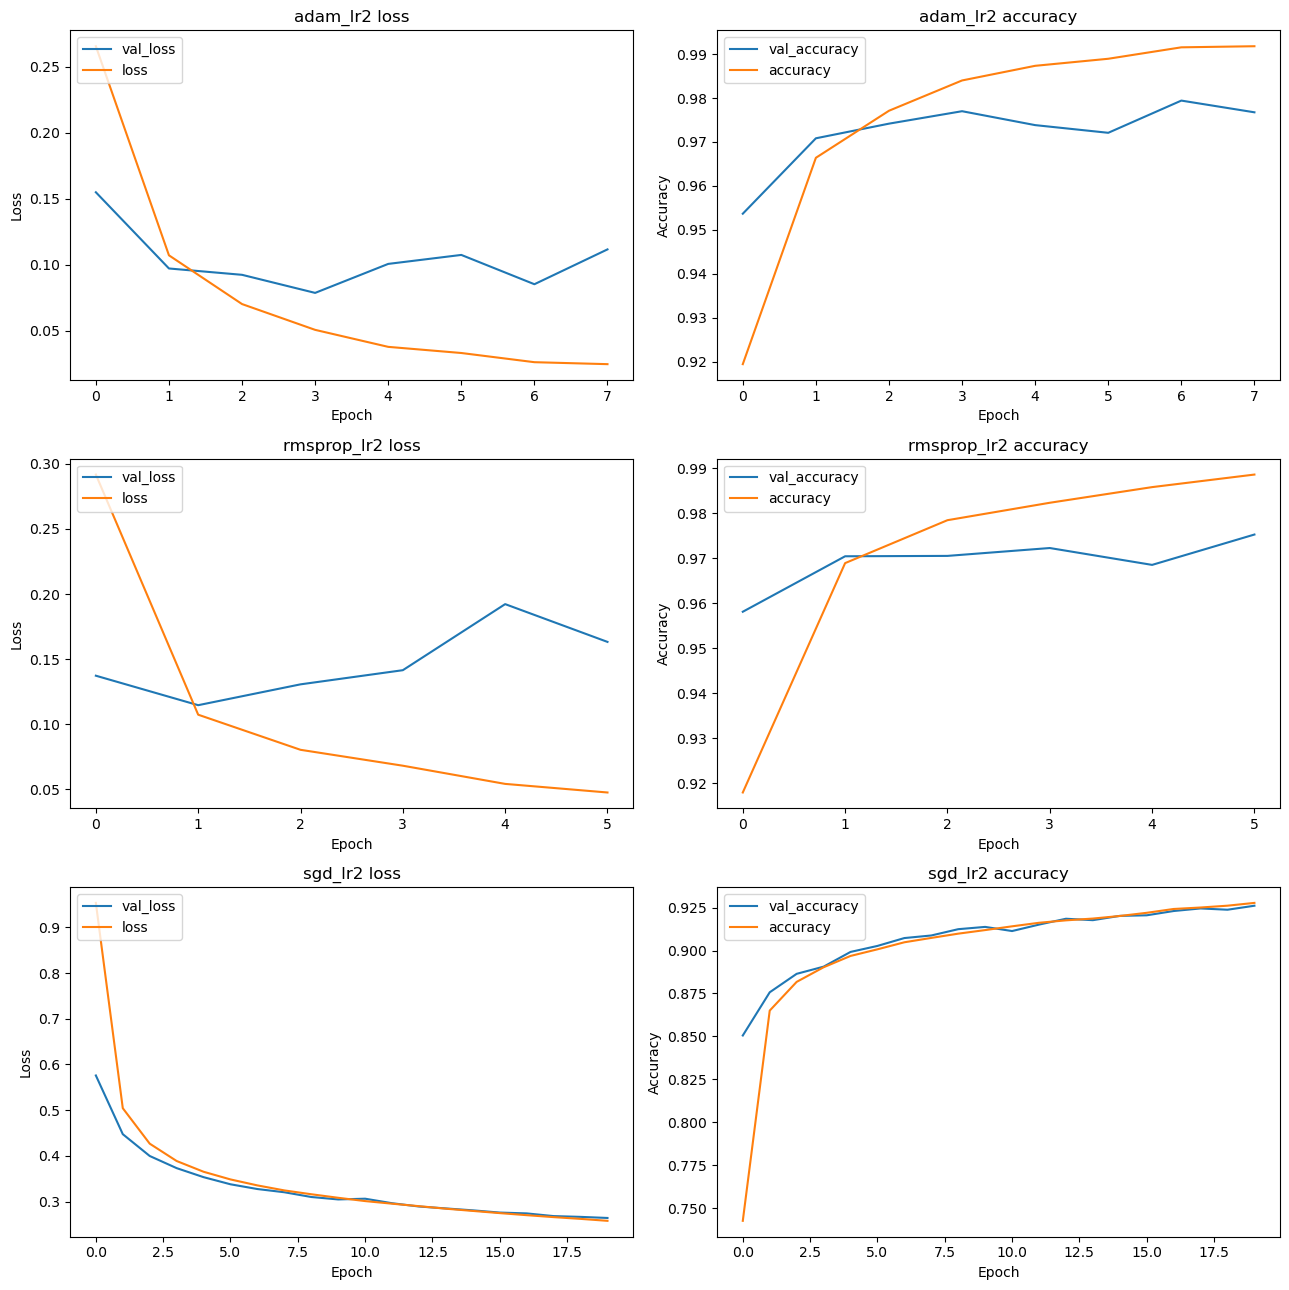

In [13]:
plot_train_results(train_results)

In [15]:
for model in models:
    print(f"model {model.name} validation loss: {train_results[model.name]['val_loss']}")
    print(f"model {model.name} validation accuracy: {train_results[model.name]['val_accuracy']}")
    print('\n')

model adam_lr2 validation loss: 0.11157926172018051
model adam_lr2 validation accuracy: 0.9767500162124634


model rmsprop_lr2 validation loss: 0.16329512000083923
model rmsprop_lr2 validation accuracy: 0.9752500057220459


model sgd_lr2 validation loss: 0.2640928328037262
model sgd_lr2 validation accuracy: 0.9260833263397217




The models with optimizer `Adam` and `RMSprop` show bad performance, models that are good in training but have bad predicting (validation data).

The models show a situation where the training loss (`loss`) curves are low and the validation loss (`val_loss`) curves are erratic and increase, which indicates overfitting.

The model with optimizer `SGD` in general has a good performance in training and validation.

A way to optimize the model performance with overfitting is:
- Reduce the training time with a higher `batch size` 
- Use `regularization` as `dropout` or `L1` or `L2` techniques
- Use `earlystopping` to stop the training at a certain `epoch` number 

## Model Convergence:

The `accuracy` is not enough to select the right model, the number of `epochs` plays a significant role in determining the model convergence and performance.

A way to find an optimal number of `epochs` is using `early stopping`, this regularization technique stops the training as soon as the validation error reaches a minimum preventing overfitting. Determining an appropriate number of `epochs` also helps manage computational resources effectively by avoiding unnecessary training iterations.

The `batch size` hyperparameter also has a significant impact on the model performance and training time. In practice models with a high `batch size` are not generalized as well as models with a low `batch size`.


`Convergence` tells us that the model has understood the patterns in the data and is making accurate predictions.

*During the training of a machine learning model, the current state of the model at each step of the training algorithm can be evaluated. It can be evaluated on the training dataset to give an idea of how well the model is “learning.” It can also be evaluated on a hold-out validation dataset that is not part of the training dataset. Evaluation on the validation dataset gives an idea of how well the model is “generalizing.”* **Jason Browlee(Aug 6,2019). [How to use Learning Curves to Diagnose Machine Learning Model Performance](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)**

**NOTE**

*The optimal learning rate depends on the other hyperparameters—
especially the batch size—so if you modify any hyperparameter,
make sure to update the learning rate as well.* **Aurélien Géron - Hands-on
Machine Learning with scikit-learn,keras & tensorflow**

### Model Convergence: Adam

In [82]:
earlystopping = EarlyStopping(monitor = "val_loss",
                                patience = 4,
                                mode = 'auto',
                                restore_best_weights = True,
                                verbose = 1)

adam_estimator = KerasClassifier(
    model,
    unitsHL1=750,
    unitsHL2=200,
    dropoutHL1 = 0,
    dropoutHL2 = 0,
    optimizer_learning_rate=0.001,
    optimizer_momentum = 0.0,
    optimizer='Adam',
    callbacks=[earlystopping],
    epochs=24,
)
adam_param_grid = {
    'optimizer_learning_rate':[0.001,0.0015,0.002],
    'batch_size':[275,300,325],
}
adam_grid = GridSearchCV(
    estimator=adam_estimator, 
    param_grid=adam_param_grid,
    cv=4, # cross-validation default 5-fold
)

In [83]:
with tf.device('GPU:0'):
    adam_grid_result = adam_grid.fit(
        X= X_train, 
        y= y_train,
        validation_data=(X_validation,y_validation),
        verbose=1,   
    )

Epoch 1/24
131/131 [==============================] - 1s 8ms/step - loss: 0.5676 - accuracy: 0.8395 - val_loss: 0.2855 - val_accuracy: 0.9172
Epoch 2/24
131/131 [==============================] - 1s 4ms/step - loss: 0.2482 - accuracy: 0.9265 - val_loss: 0.2258 - val_accuracy: 0.9338
Epoch 3/24
131/131 [==============================] - 1s 4ms/step - loss: 0.1842 - accuracy: 0.9465 - val_loss: 0.1831 - val_accuracy: 0.9477
Epoch 4/24
131/131 [==============================] - 1s 5ms/step - loss: 0.1454 - accuracy: 0.9564 - val_loss: 0.1524 - val_accuracy: 0.9535
Epoch 5/24
131/131 [==============================] - 1s 5ms/step - loss: 0.1141 - accuracy: 0.9673 - val_loss: 0.1385 - val_accuracy: 0.9579
Epoch 6/24
131/131 [==============================] - 1s 4ms/step - loss: 0.0899 - accuracy: 0.9740 - val_loss: 0.1180 - val_accuracy: 0.9645
Epoch 7/24
131/131 [==============================] - 1s 4ms/step - loss: 0.0712 - accuracy: 0.9801 - val_loss: 0.1071 - val_accuracy: 0.9668
Epoch 

131/131 [==============================] - 1s 4ms/step - loss: 0.2242 - accuracy: 0.9351 - val_loss: 0.1951 - val_accuracy: 0.9453
Epoch 3/24
131/131 [==============================] - 1s 4ms/step - loss: 0.1626 - accuracy: 0.9527 - val_loss: 0.1565 - val_accuracy: 0.9544
Epoch 4/24
131/131 [==============================] - 1s 4ms/step - loss: 0.1214 - accuracy: 0.9650 - val_loss: 0.1318 - val_accuracy: 0.9618
Epoch 5/24
131/131 [==============================] - 1s 4ms/step - loss: 0.0923 - accuracy: 0.9730 - val_loss: 0.1176 - val_accuracy: 0.9651
Epoch 6/24
131/131 [==============================] - 1s 4ms/step - loss: 0.0740 - accuracy: 0.9779 - val_loss: 0.1090 - val_accuracy: 0.9652
Epoch 7/24
131/131 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.9836 - val_loss: 0.0996 - val_accuracy: 0.9700
Epoch 8/24
131/131 [==============================] - 1s 5ms/step - loss: 0.0428 - accuracy: 0.9878 - val_loss: 0.1025 - val_accuracy: 0.9686
Epoch 9/24
131/13

Epoch 11: early stopping
44/44 [==============================] - 0s 2ms/step
Epoch 1/24
131/131 [==============================] - 1s 7ms/step - loss: 0.7629 - accuracy: 0.8222 - val_loss: 0.2694 - val_accuracy: 0.9200
Epoch 2/24
131/131 [==============================] - 1s 4ms/step - loss: 0.2143 - accuracy: 0.9376 - val_loss: 0.1844 - val_accuracy: 0.9464
Epoch 3/24
131/131 [==============================] - 1s 4ms/step - loss: 0.1511 - accuracy: 0.9559 - val_loss: 0.1478 - val_accuracy: 0.9580
Epoch 4/24
131/131 [==============================] - 1s 4ms/step - loss: 0.1098 - accuracy: 0.9680 - val_loss: 0.1244 - val_accuracy: 0.9636
Epoch 5/24
131/131 [==============================] - 1s 4ms/step - loss: 0.0809 - accuracy: 0.9759 - val_loss: 0.1132 - val_accuracy: 0.9667
Epoch 6/24
131/131 [==============================] - 1s 4ms/step - loss: 0.0639 - accuracy: 0.9801 - val_loss: 0.1055 - val_accuracy: 0.9684
Epoch 7/24
131/131 [==============================] - 1s 4ms/step - lo

Epoch 6/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9792 - val_loss: 0.1062 - val_accuracy: 0.9669
Epoch 7/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9840 - val_loss: 0.0986 - val_accuracy: 0.9706
Epoch 8/24
120/120 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.9875 - val_loss: 0.0901 - val_accuracy: 0.9722
Epoch 9/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9909 - val_loss: 0.0926 - val_accuracy: 0.9728
Epoch 10/24
120/120 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9932 - val_loss: 0.0864 - val_accuracy: 0.9745
Epoch 11/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9953 - val_loss: 0.0940 - val_accuracy: 0.9727
Epoch 12/24
120/120 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9971 - val_loss: 0.0866 - val_accuracy: 0.9758
Epo

Epoch 8/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9868 - val_loss: 0.0970 - val_accuracy: 0.9704
Epoch 9/24
120/120 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9903 - val_loss: 0.0923 - val_accuracy: 0.9733
Epoch 10/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9929 - val_loss: 0.0928 - val_accuracy: 0.9735
Epoch 11/24
120/120 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9947 - val_loss: 0.0947 - val_accuracy: 0.9718
Epoch 12/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9967 - val_loss: 0.0926 - val_accuracy: 0.9738
Epoch 13/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9969 - val_loss: 0.0900 - val_accuracy: 0.9758
Epoch 14/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9977 - val_loss: 0.0947 - val_accuracy: 0.9738
E

Epoch 13/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9979 - val_loss: 0.0992 - val_accuracy: 0.9737
Epoch 13: early stopping
40/40 [==============================] - 0s 2ms/step
Epoch 1/24
120/120 [==============================] - 1s 5ms/step - loss: 0.7625 - accuracy: 0.8183 - val_loss: 0.2711 - val_accuracy: 0.9183
Epoch 2/24
120/120 [==============================] - 0s 3ms/step - loss: 0.2210 - accuracy: 0.9356 - val_loss: 0.1951 - val_accuracy: 0.9442
Epoch 3/24
120/120 [==============================] - 0s 3ms/step - loss: 0.1533 - accuracy: 0.9557 - val_loss: 0.1578 - val_accuracy: 0.9542
Epoch 4/24
120/120 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.9688 - val_loss: 0.1266 - val_accuracy: 0.9622
Epoch 5/24
120/120 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9755 - val_loss: 0.1150 - val_accuracy: 0.9665
Epoch 6/24
120/120 [==============================] - 0s 3ms/step - l

111/111 [==============================] - 0s 4ms/step - loss: 0.0120 - accuracy: 0.9978 - val_loss: 0.0918 - val_accuracy: 0.9738
Epoch 16: early stopping
37/37 [==============================] - 0s 2ms/step
Epoch 1/24
111/111 [==============================] - 1s 7ms/step - loss: 0.6366 - accuracy: 0.8217 - val_loss: 0.3098 - val_accuracy: 0.9078
Epoch 2/24
111/111 [==============================] - 0s 4ms/step - loss: 0.2588 - accuracy: 0.9245 - val_loss: 0.2358 - val_accuracy: 0.9327
Epoch 3/24
111/111 [==============================] - 0s 4ms/step - loss: 0.2014 - accuracy: 0.9415 - val_loss: 0.1974 - val_accuracy: 0.9433
Epoch 4/24
111/111 [==============================] - 1s 5ms/step - loss: 0.1620 - accuracy: 0.9534 - val_loss: 0.1662 - val_accuracy: 0.9528
Epoch 5/24
111/111 [==============================] - 1s 5ms/step - loss: 0.1313 - accuracy: 0.9614 - val_loss: 0.1462 - val_accuracy: 0.9575
Epoch 6/24
111/111 [==============================] - 1s 5ms/step - loss: 0.1092 

Epoch 12/24
111/111 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 0.9963 - val_loss: 0.0850 - val_accuracy: 0.9762
Epoch 13/24
111/111 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9977 - val_loss: 0.0915 - val_accuracy: 0.9726
Epoch 14/24
111/111 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9985 - val_loss: 0.0854 - val_accuracy: 0.9757
Epoch 15/24
111/111 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.0894 - val_accuracy: 0.9753
Epoch 16/24
111/111 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.0860 - val_accuracy: 0.9762
Epoch 16: early stopping
37/37 [==============================] - 0s 2ms/step
Epoch 1/24
111/111 [==============================] - 1s 7ms/step - loss: 0.7192 - accuracy: 0.8163 - val_loss: 0.2783 - val_accuracy: 0.9192
Epoch 2/24
111/111 [==============================] - 0s 4ms/step

Epoch 12/24
111/111 [==============================] - 0s 4ms/step - loss: 0.0180 - accuracy: 0.9962 - val_loss: 0.0942 - val_accuracy: 0.9733
Epoch 13/24
111/111 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 0.9965 - val_loss: 0.0968 - val_accuracy: 0.9725
Epoch 13: early stopping
37/37 [==============================] - 0s 2ms/step
Epoch 1/24
111/111 [==============================] - 1s 7ms/step - loss: 0.8186 - accuracy: 0.8099 - val_loss: 0.2647 - val_accuracy: 0.9223
Epoch 2/24
111/111 [==============================] - 0s 4ms/step - loss: 0.2245 - accuracy: 0.9327 - val_loss: 0.1966 - val_accuracy: 0.9423
Epoch 3/24
111/111 [==============================] - 0s 4ms/step - loss: 0.1604 - accuracy: 0.9534 - val_loss: 0.1608 - val_accuracy: 0.9548
Epoch 4/24
111/111 [==============================] - 0s 4ms/step - loss: 0.1221 - accuracy: 0.9648 - val_loss: 0.1378 - val_accuracy: 0.9587
Epoch 5/24
111/111 [==============================] - 0s 4ms/step - 

In [84]:
print("Best score: %f using %s" % (adam_grid_result.best_score_, adam_grid_result.best_params_))

Best score: 0.973729 using {'batch_size': 300, 'optimizer_learning_rate': 0.0015}


In [91]:
print("best estimator stopped epoch:",adam_grid_result.best_estimator_.current_epoch)

best estimator stopped epoch: 13


### Model Convergence: RMSprop

In [101]:
earlystopping = EarlyStopping(monitor = "val_loss",
                                patience = 5,
                                mode = 'auto',
                                restore_best_weights = True,
                                verbose = 1)

rmsprop_estimator = KerasClassifier(
    model,
    unitsHL1=750,
    unitsHL2=200,
    dropoutHL1 = 0,
    dropoutHL2 = 0,
    optimizer_learning_rate=0.001,
    optimizer_momentum = 0.0,
    optimizer='RMSprop',
    callbacks=[earlystopping],
    epochs=25,
)
rmsprop_param_grid = {
    'optimizer_learning_rate':[0.001,0.0015,0.002],
    'optimizer_momentum':[0.0,0.001],
    'batch_size':[350,400,450]
}
rmsprop_grid = GridSearchCV(
    estimator=rmsprop_estimator, 
    param_grid=rmsprop_param_grid,
    cv=4, # cross-validation default 5-fold
)

In [102]:
with tf.device('GPU:0'):
    rmsprop_grid_result = rmsprop_grid.fit(
        X= X_train, 
        y= y_train,
        validation_data=(X_validation,y_validation),
        verbose=1,   
)

Epoch 1/25
103/103 [==============================] - 1s 9ms/step - loss: 0.6317 - accuracy: 0.8233 - val_loss: 0.2970 - val_accuracy: 0.9144
Epoch 2/25
103/103 [==============================] - 1s 5ms/step - loss: 0.2625 - accuracy: 0.9230 - val_loss: 0.2343 - val_accuracy: 0.9310
Epoch 3/25
103/103 [==============================] - 1s 5ms/step - loss: 0.2039 - accuracy: 0.9407 - val_loss: 0.1990 - val_accuracy: 0.9437
Epoch 4/25
103/103 [==============================] - 1s 5ms/step - loss: 0.1630 - accuracy: 0.9530 - val_loss: 0.1721 - val_accuracy: 0.9503
Epoch 5/25
103/103 [==============================] - 1s 5ms/step - loss: 0.1306 - accuracy: 0.9628 - val_loss: 0.1456 - val_accuracy: 0.9561
Epoch 6/25
103/103 [==============================] - 1s 5ms/step - loss: 0.1058 - accuracy: 0.9690 - val_loss: 0.1289 - val_accuracy: 0.9626
Epoch 7/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0865 - accuracy: 0.9756 - val_loss: 0.1234 - val_accuracy: 0.9622
Epoch 

103/103 [==============================] - 1s 5ms/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.0892 - val_accuracy: 0.9760
Epoch 21: early stopping
35/35 [==============================] - 0s 2ms/step
Epoch 1/25
103/103 [==============================] - 1s 7ms/step - loss: 0.6166 - accuracy: 0.8262 - val_loss: 0.3001 - val_accuracy: 0.9133
Epoch 2/25
103/103 [==============================] - 1s 6ms/step - loss: 0.2567 - accuracy: 0.9245 - val_loss: 0.2350 - val_accuracy: 0.9321
Epoch 3/25
103/103 [==============================] - 1s 5ms/step - loss: 0.2015 - accuracy: 0.9403 - val_loss: 0.1965 - val_accuracy: 0.9438
Epoch 4/25
103/103 [==============================] - 1s 5ms/step - loss: 0.1632 - accuracy: 0.9519 - val_loss: 0.1615 - val_accuracy: 0.9547
Epoch 5/25
103/103 [==============================] - 1s 5ms/step - loss: 0.1310 - accuracy: 0.9620 - val_loss: 0.1456 - val_accuracy: 0.9572
Epoch 6/25
103/103 [==============================] - 1s 6ms/step - loss: 0.1051 

Epoch 10/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0551 - accuracy: 0.9850 - val_loss: 0.1009 - val_accuracy: 0.9698
Epoch 11/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0446 - accuracy: 0.9884 - val_loss: 0.1000 - val_accuracy: 0.9693
Epoch 12/25
103/103 [==============================] - 0s 5ms/step - loss: 0.0366 - accuracy: 0.9912 - val_loss: 0.0963 - val_accuracy: 0.9703
Epoch 13/25
103/103 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9916 - val_loss: 0.0975 - val_accuracy: 0.9707
Epoch 14/25
103/103 [==============================] - 0s 5ms/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.1002 - val_accuracy: 0.9703
Epoch 15/25
103/103 [==============================] - 1s 6ms/step - loss: 0.0213 - accuracy: 0.9953 - val_loss: 0.1010 - val_accuracy: 0.9717
Epoch 16/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0184 - accuracy: 0.9955 - val_loss: 0.0932 - val_accuracy: 0.9720

Epoch 3/25
103/103 [==============================] - 1s 5ms/step - loss: 0.1795 - accuracy: 0.9478 - val_loss: 0.1854 - val_accuracy: 0.9459
Epoch 4/25
103/103 [==============================] - 1s 5ms/step - loss: 0.1397 - accuracy: 0.9596 - val_loss: 0.1485 - val_accuracy: 0.9561
Epoch 5/25
103/103 [==============================] - 1s 6ms/step - loss: 0.1115 - accuracy: 0.9673 - val_loss: 0.1303 - val_accuracy: 0.9641
Epoch 6/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0877 - accuracy: 0.9745 - val_loss: 0.1202 - val_accuracy: 0.9639
Epoch 7/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0724 - accuracy: 0.9792 - val_loss: 0.1129 - val_accuracy: 0.9644
Epoch 8/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0551 - accuracy: 0.9846 - val_loss: 0.1012 - val_accuracy: 0.9702
Epoch 9/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0442 - accuracy: 0.9878 - val_loss: 0.1016 - val_accuracy: 0.9696
Epoch 

Epoch 4/25
103/103 [==============================] - 0s 5ms/step - loss: 0.1443 - accuracy: 0.9582 - val_loss: 0.1480 - val_accuracy: 0.9576
Epoch 5/25
103/103 [==============================] - 0s 5ms/step - loss: 0.1138 - accuracy: 0.9669 - val_loss: 0.1288 - val_accuracy: 0.9625
Epoch 6/25
103/103 [==============================] - 1s 6ms/step - loss: 0.0890 - accuracy: 0.9750 - val_loss: 0.1238 - val_accuracy: 0.9626
Epoch 7/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0727 - accuracy: 0.9789 - val_loss: 0.1069 - val_accuracy: 0.9676
Epoch 8/25
103/103 [==============================] - 0s 5ms/step - loss: 0.0574 - accuracy: 0.9840 - val_loss: 0.1015 - val_accuracy: 0.9690
Epoch 9/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0450 - accuracy: 0.9877 - val_loss: 0.1031 - val_accuracy: 0.9669
Epoch 10/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0365 - accuracy: 0.9904 - val_loss: 0.1006 - val_accuracy: 0.9688
Epoch

Epoch 3/25
103/103 [==============================] - 1s 5ms/step - loss: 0.1682 - accuracy: 0.9504 - val_loss: 0.1656 - val_accuracy: 0.9531
Epoch 4/25
103/103 [==============================] - 1s 5ms/step - loss: 0.1283 - accuracy: 0.9630 - val_loss: 0.1378 - val_accuracy: 0.9598
Epoch 5/25
103/103 [==============================] - 1s 6ms/step - loss: 0.0975 - accuracy: 0.9724 - val_loss: 0.1205 - val_accuracy: 0.9637
Epoch 6/25
103/103 [==============================] - 0s 5ms/step - loss: 0.0755 - accuracy: 0.9783 - val_loss: 0.1058 - val_accuracy: 0.9693
Epoch 7/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0589 - accuracy: 0.9827 - val_loss: 0.1044 - val_accuracy: 0.9690
Epoch 8/25
103/103 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9871 - val_loss: 0.0947 - val_accuracy: 0.9707
Epoch 9/25
103/103 [==============================] - 1s 6ms/step - loss: 0.0357 - accuracy: 0.9903 - val_loss: 0.1016 - val_accuracy: 0.9711
Epoch 

Epoch 9/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0341 - accuracy: 0.9909 - val_loss: 0.0921 - val_accuracy: 0.9725
Epoch 10/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0268 - accuracy: 0.9933 - val_loss: 0.0969 - val_accuracy: 0.9729
Epoch 11/25
103/103 [==============================] - 1s 6ms/step - loss: 0.0215 - accuracy: 0.9945 - val_loss: 0.1008 - val_accuracy: 0.9708
Epoch 12/25
103/103 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 0.9970 - val_loss: 0.0941 - val_accuracy: 0.9737
Epoch 13/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0137 - accuracy: 0.9968 - val_loss: 0.1026 - val_accuracy: 0.9709
Epoch 14/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0114 - accuracy: 0.9974 - val_loss: 0.1044 - val_accuracy: 0.9723
Epoch 14: early stopping
35/35 [==============================] - 0s 2ms/step
Epoch 1/25
103/103 [==============================] - 1s 9ms/step

103/103 [==============================] - 1s 6ms/step - loss: 0.0132 - accuracy: 0.9970 - val_loss: 0.0966 - val_accuracy: 0.9738
Epoch 13: early stopping
35/35 [==============================] - 0s 3ms/step
Epoch 1/25
103/103 [==============================] - 1s 7ms/step - loss: 0.8254 - accuracy: 0.8050 - val_loss: 0.2707 - val_accuracy: 0.9206
Epoch 2/25
103/103 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.9338 - val_loss: 0.2035 - val_accuracy: 0.9413
Epoch 3/25
103/103 [==============================] - 0s 5ms/step - loss: 0.1658 - accuracy: 0.9516 - val_loss: 0.1721 - val_accuracy: 0.9500
Epoch 4/25
103/103 [==============================] - 1s 5ms/step - loss: 0.1253 - accuracy: 0.9647 - val_loss: 0.1382 - val_accuracy: 0.9591
Epoch 5/25
103/103 [==============================] - 1s 5ms/step - loss: 0.0982 - accuracy: 0.9722 - val_loss: 0.1201 - val_accuracy: 0.9647
Epoch 6/25
103/103 [==============================] - 0s 5ms/step - loss: 0.0754 

90/90 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 0.9997 - val_loss: 0.0964 - val_accuracy: 0.9744
Epoch 25/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.0940 - val_accuracy: 0.9749
Epoch 25: early stopping
30/30 [==============================] - 0s 2ms/step
Epoch 1/25
90/90 [==============================] - 1s 7ms/step - loss: 0.6686 - accuracy: 0.8113 - val_loss: 0.3024 - val_accuracy: 0.9127
Epoch 2/25
90/90 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.9184 - val_loss: 0.2487 - val_accuracy: 0.9265
Epoch 3/25
90/90 [==============================] - 0s 4ms/step - loss: 0.2180 - accuracy: 0.9370 - val_loss: 0.2104 - val_accuracy: 0.9395
Epoch 4/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.9482 - val_loss: 0.1848 - val_accuracy: 0.9467
Epoch 5/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1462 - accuracy: 0

90/90 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9916 - val_loss: 0.0996 - val_accuracy: 0.9697
Epoch 12/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 0.9937 - val_loss: 0.0886 - val_accuracy: 0.9745
Epoch 13/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0201 - accuracy: 0.9954 - val_loss: 0.0918 - val_accuracy: 0.9736
Epoch 14/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0164 - accuracy: 0.9968 - val_loss: 0.0888 - val_accuracy: 0.9747
Epoch 15/25
90/90 [==============================] - 0s 5ms/step - loss: 0.0152 - accuracy: 0.9967 - val_loss: 0.0893 - val_accuracy: 0.9747
Epoch 16/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9979 - val_loss: 0.0845 - val_accuracy: 0.9756
Epoch 17/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 0.9988 - val_loss: 0.0867 - val_accuracy: 0.9762
Epoch 18/25
90/90 [======

Epoch 9/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9854 - val_loss: 0.1044 - val_accuracy: 0.9684
Epoch 10/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9879 - val_loss: 0.1001 - val_accuracy: 0.9693
Epoch 11/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9908 - val_loss: 0.1022 - val_accuracy: 0.9689
Epoch 12/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9921 - val_loss: 0.0944 - val_accuracy: 0.9709
Epoch 13/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0243 - accuracy: 0.9941 - val_loss: 0.0949 - val_accuracy: 0.9718
Epoch 14/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.9951 - val_loss: 0.0911 - val_accuracy: 0.9737
Epoch 15/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.9964 - val_loss: 0.0985 - val_accuracy: 0.9735
Epoch 16/25
90

Epoch 15/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.9989 - val_loss: 0.0990 - val_accuracy: 0.9745
Epoch 16/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.0952 - val_accuracy: 0.9758
Epoch 16: early stopping
30/30 [==============================] - 0s 2ms/step
Epoch 1/25
90/90 [==============================] - 1s 6ms/step - loss: 0.8866 - accuracy: 0.7896 - val_loss: 0.2832 - val_accuracy: 0.9175
Epoch 2/25
90/90 [==============================] - 0s 4ms/step - loss: 0.2426 - accuracy: 0.9304 - val_loss: 0.2172 - val_accuracy: 0.9348
Epoch 3/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1772 - accuracy: 0.9481 - val_loss: 0.1739 - val_accuracy: 0.9503
Epoch 4/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1373 - accuracy: 0.9607 - val_loss: 0.1562 - val_accuracy: 0.9535
Epoch 5/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1105 -

Epoch 12/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.9877 - val_loss: 0.0977 - val_accuracy: 0.9693
Epoch 13/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 0.9900 - val_loss: 0.0994 - val_accuracy: 0.9698
Epoch 14/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9909 - val_loss: 0.0954 - val_accuracy: 0.9713
Epoch 15/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9927 - val_loss: 0.0906 - val_accuracy: 0.9735
Epoch 16/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9943 - val_loss: 0.0932 - val_accuracy: 0.9726
Epoch 17/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9958 - val_loss: 0.0912 - val_accuracy: 0.9730
Epoch 18/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0163 - accuracy: 0.9973 - val_loss: 0.0967 - val_accuracy: 0.9721
Epoch 19/25
8

80/80 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 0.9998 - val_loss: 0.0927 - val_accuracy: 0.9751
Epoch 25: early stopping
27/27 [==============================] - 0s 2ms/step
Epoch 1/25
80/80 [==============================] - 1s 7ms/step - loss: 0.6964 - accuracy: 0.8032 - val_loss: 0.3084 - val_accuracy: 0.9111
Epoch 2/25
80/80 [==============================] - 0s 4ms/step - loss: 0.2803 - accuracy: 0.9167 - val_loss: 0.2631 - val_accuracy: 0.9226
Epoch 3/25
80/80 [==============================] - 0s 4ms/step - loss: 0.2239 - accuracy: 0.9352 - val_loss: 0.2224 - val_accuracy: 0.9355
Epoch 4/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1880 - accuracy: 0.9454 - val_loss: 0.1858 - val_accuracy: 0.9469
Epoch 5/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1556 - accuracy: 0.9555 - val_loss: 0.1655 - val_accuracy: 0.9532
Epoch 6/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.

Epoch 7/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1098 - accuracy: 0.9689 - val_loss: 0.1388 - val_accuracy: 0.9578
Epoch 8/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0937 - accuracy: 0.9747 - val_loss: 0.1242 - val_accuracy: 0.9634
Epoch 9/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0801 - accuracy: 0.9780 - val_loss: 0.1151 - val_accuracy: 0.9657
Epoch 10/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0674 - accuracy: 0.9824 - val_loss: 0.1129 - val_accuracy: 0.9655
Epoch 11/25
80/80 [==============================] - 0s 5ms/step - loss: 0.0575 - accuracy: 0.9841 - val_loss: 0.0999 - val_accuracy: 0.9697
Epoch 12/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.9876 - val_loss: 0.0992 - val_accuracy: 0.9702
Epoch 13/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9888 - val_loss: 0.1020 - val_accuracy: 0.9691
Epoch 14/25
80/8

80/80 [==============================] - 1s 8ms/step - loss: 0.8343 - accuracy: 0.7897 - val_loss: 0.3002 - val_accuracy: 0.9108
Epoch 2/25
80/80 [==============================] - 0s 4ms/step - loss: 0.2595 - accuracy: 0.9230 - val_loss: 0.2326 - val_accuracy: 0.9315
Epoch 3/25
80/80 [==============================] - 0s 4ms/step - loss: 0.2004 - accuracy: 0.9415 - val_loss: 0.1938 - val_accuracy: 0.9452
Epoch 4/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1570 - accuracy: 0.9549 - val_loss: 0.1570 - val_accuracy: 0.9559
Epoch 5/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9628 - val_loss: 0.1403 - val_accuracy: 0.9583
Epoch 6/25
80/80 [==============================] - 0s 5ms/step - loss: 0.1030 - accuracy: 0.9703 - val_loss: 0.1264 - val_accuracy: 0.9630
Epoch 7/25
80/80 [==============================] - 0s 6ms/step - loss: 0.0842 - accuracy: 0.9758 - val_loss: 0.1161 - val_accuracy: 0.9660
Epoch 8/25
80/80 [=============

27/27 [==============================] - 0s 2ms/step
Epoch 1/25
80/80 [==============================] - 1s 7ms/step - loss: 1.0448 - accuracy: 0.7660 - val_loss: 0.2979 - val_accuracy: 0.9126
Epoch 2/25
80/80 [==============================] - 0s 4ms/step - loss: 0.2528 - accuracy: 0.9258 - val_loss: 0.2246 - val_accuracy: 0.9342
Epoch 3/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.9451 - val_loss: 0.1862 - val_accuracy: 0.9472
Epoch 4/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1486 - accuracy: 0.9570 - val_loss: 0.1514 - val_accuracy: 0.9567
Epoch 5/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.9656 - val_loss: 0.1362 - val_accuracy: 0.9603
Epoch 6/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0931 - accuracy: 0.9733 - val_loss: 0.1208 - val_accuracy: 0.9639
Epoch 7/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.9782 - val_los

Epoch 21: early stopping
27/27 [==============================] - 0s 2ms/step
Epoch 1/25
80/80 [==============================] - 1s 7ms/step - loss: 0.9444 - accuracy: 0.7858 - val_loss: 0.2923 - val_accuracy: 0.9140
Epoch 2/25
80/80 [==============================] - 0s 5ms/step - loss: 0.2502 - accuracy: 0.9263 - val_loss: 0.2264 - val_accuracy: 0.9316
Epoch 3/25
80/80 [==============================] - 0s 5ms/step - loss: 0.1873 - accuracy: 0.9454 - val_loss: 0.1799 - val_accuracy: 0.9482
Epoch 4/25
80/80 [==============================] - 0s 5ms/step - loss: 0.1425 - accuracy: 0.9591 - val_loss: 0.1441 - val_accuracy: 0.9588
Epoch 5/25
80/80 [==============================] - 0s 5ms/step - loss: 0.1126 - accuracy: 0.9681 - val_loss: 0.1284 - val_accuracy: 0.9620
Epoch 6/25
80/80 [==============================] - 0s 5ms/step - loss: 0.0890 - accuracy: 0.9746 - val_loss: 0.1125 - val_accuracy: 0.9672
Epoch 7/25
80/80 [==============================] - 0s 5ms/step - loss: 0.0710 - a

80/80 [==============================] - 1s 8ms/step - loss: 0.9929 - accuracy: 0.7719 - val_loss: 0.2971 - val_accuracy: 0.9139
Epoch 2/25
80/80 [==============================] - 0s 5ms/step - loss: 0.2547 - accuracy: 0.9258 - val_loss: 0.2268 - val_accuracy: 0.9335
Epoch 3/25
80/80 [==============================] - 0s 5ms/step - loss: 0.1877 - accuracy: 0.9451 - val_loss: 0.1847 - val_accuracy: 0.9457
Epoch 4/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1474 - accuracy: 0.9581 - val_loss: 0.1654 - val_accuracy: 0.9510
Epoch 5/25
80/80 [==============================] - 0s 4ms/step - loss: 0.1206 - accuracy: 0.9656 - val_loss: 0.1336 - val_accuracy: 0.9610
Epoch 6/25
80/80 [==============================] - 0s 4ms/step - loss: 0.0945 - accuracy: 0.9738 - val_loss: 0.1190 - val_accuracy: 0.9644
Epoch 7/25
80/80 [==============================] - 0s 5ms/step - loss: 0.0763 - accuracy: 0.9787 - val_loss: 0.1147 - val_accuracy: 0.9655
Epoch 8/25
80/80 [=============

In [103]:
print("Best score: %f using %s" % (rmsprop_grid_result.best_score_, rmsprop_grid_result.best_params_))

Best score: 0.974313 using {'batch_size': 400, 'optimizer_learning_rate': 0.0015, 'optimizer_momentum': 0.0}


In [104]:
print("best estimator stopped epoch:",rmsprop_grid_result.best_estimator_.current_epoch)

best estimator stopped epoch: 20


### Model Convergence: SGD

In [16]:
earlystopping = EarlyStopping(monitor = "val_loss",
                                patience = 5,
                                mode = 'auto',
                                restore_best_weights = True,
                                verbose = 1)

sgd_estimator = KerasClassifier(
    model,
    unitsHL1=750,
    unitsHL2=400,
    dropoutHL1 = 0,
    dropoutHL2 = 0,
    optimizer_learning_rate=0.001,
    optimizer_momentum = 0.0,
    optimizer='SGD',
    callbacks=[earlystopping],
    epochs=30,
)
sgd_param_grid = {
    'optimizer_learning_rate':[0.001,0.0015,0.002],
    'batch_size':[100,200,300]
}
sgd_grid = GridSearchCV(
    estimator=sgd_estimator, 
    param_grid=sgd_param_grid,
    cv=4, # cross-validation default 5-fold
)

In [17]:
with tf.device('GPU:0'):
    sgd_grid_result = sgd_grid.fit(
        X= X_train, 
        y= y_train,
        validation_data=(X_validation,y_validation),
        verbose=1,   
)

Epoch 1/30
360/360 [==============================] - 2s 5ms/step - loss: 0.4423 - accuracy: 0.8814 - val_loss: 0.2123 - val_accuracy: 0.9382
Epoch 2/30
360/360 [==============================] - 1s 3ms/step - loss: 0.1675 - accuracy: 0.9507 - val_loss: 0.1469 - val_accuracy: 0.9563
Epoch 3/30
360/360 [==============================] - 1s 3ms/step - loss: 0.1047 - accuracy: 0.9677 - val_loss: 0.1224 - val_accuracy: 0.9628
Epoch 4/30
360/360 [==============================] - 1s 3ms/step - loss: 0.0724 - accuracy: 0.9780 - val_loss: 0.1035 - val_accuracy: 0.9675
Epoch 5/30
360/360 [==============================] - 1s 3ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.1000 - val_accuracy: 0.9701
Epoch 6/30
360/360 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0957 - val_accuracy: 0.9717
Epoch 7/30
360/360 [==============================] - 1s 3ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0957 - val_accuracy: 0.9732
Epoch 

Epoch 2/30
360/360 [==============================] - 1s 4ms/step - loss: 0.1284 - accuracy: 0.9613 - val_loss: 0.1130 - val_accuracy: 0.9648
Epoch 3/30
360/360 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9736 - val_loss: 0.1073 - val_accuracy: 0.9677
Epoch 4/30
360/360 [==============================] - 1s 3ms/step - loss: 0.0573 - accuracy: 0.9812 - val_loss: 0.1101 - val_accuracy: 0.9653
Epoch 5/30
360/360 [==============================] - 1s 3ms/step - loss: 0.0415 - accuracy: 0.9860 - val_loss: 0.1022 - val_accuracy: 0.9707
Epoch 6/30
360/360 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.1025 - val_accuracy: 0.9704
Epoch 7/30
360/360 [==============================] - 1s 3ms/step - loss: 0.0355 - accuracy: 0.9878 - val_loss: 0.1124 - val_accuracy: 0.9702
Epoch 8/30
360/360 [==============================] - 1s 3ms/step - loss: 0.0249 - accuracy: 0.9915 - val_loss: 0.1203 - val_accuracy: 0.9712
Epoch 

180/180 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.1136 - val_accuracy: 0.9760
Epoch 17: early stopping
60/60 [==============================] - 0s 1ms/step
Epoch 1/30
180/180 [==============================] - 1s 5ms/step - loss: 0.6530 - accuracy: 0.8511 - val_loss: 0.2372 - val_accuracy: 0.9312
Epoch 2/30
180/180 [==============================] - 1s 3ms/step - loss: 0.1895 - accuracy: 0.9441 - val_loss: 0.1625 - val_accuracy: 0.9526
Epoch 3/30
180/180 [==============================] - 1s 3ms/step - loss: 0.1284 - accuracy: 0.9621 - val_loss: 0.1426 - val_accuracy: 0.9580
Epoch 4/30
180/180 [==============================] - 1s 3ms/step - loss: 0.0925 - accuracy: 0.9726 - val_loss: 0.1094 - val_accuracy: 0.9672
Epoch 5/30
180/180 [==============================] - 1s 3ms/step - loss: 0.0651 - accuracy: 0.9807 - val_loss: 0.1116 - val_accuracy: 0.9660
Epoch 6/30
180/180 [==============================] - 1s 3ms/step - loss: 0.0479 

120/120 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9905 - val_loss: 0.0922 - val_accuracy: 0.9715
Epoch 11/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9926 - val_loss: 0.0935 - val_accuracy: 0.9714
Epoch 12/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9956 - val_loss: 0.0880 - val_accuracy: 0.9755
Epoch 13/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.0907 - val_accuracy: 0.9728
Epoch 14/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 0.9976 - val_loss: 0.0902 - val_accuracy: 0.9737
Epoch 15/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 0.9982 - val_loss: 0.0888 - val_accuracy: 0.9758
Epoch 16/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.0881 - val_accuracy: 0.9763
Epoch 17/30

Epoch 6/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.9746 - val_loss: 0.1171 - val_accuracy: 0.9656
Epoch 7/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0698 - accuracy: 0.9794 - val_loss: 0.1032 - val_accuracy: 0.9689
Epoch 8/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0535 - accuracy: 0.9850 - val_loss: 0.1011 - val_accuracy: 0.9705
Epoch 9/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0443 - accuracy: 0.9872 - val_loss: 0.0972 - val_accuracy: 0.9694
Epoch 10/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0323 - accuracy: 0.9918 - val_loss: 0.0947 - val_accuracy: 0.9719
Epoch 11/30
120/120 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9930 - val_loss: 0.0954 - val_accuracy: 0.9722
Epoch 12/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9956 - val_loss: 0.0913 - val_accuracy: 0.9735
Epo

Epoch 6/30
120/120 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.9785 - val_loss: 0.1079 - val_accuracy: 0.9674
Epoch 7/30
120/120 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9842 - val_loss: 0.0982 - val_accuracy: 0.9698
Epoch 8/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.9888 - val_loss: 0.1012 - val_accuracy: 0.9698
Epoch 9/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9927 - val_loss: 0.0898 - val_accuracy: 0.9719
Epoch 10/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9936 - val_loss: 0.0939 - val_accuracy: 0.9727
Epoch 11/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9957 - val_loss: 0.0845 - val_accuracy: 0.9760
Epoch 12/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.9971 - val_loss: 0.0892 - val_accuracy: 0.9743
Epo

Epoch 12/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9971 - val_loss: 0.0939 - val_accuracy: 0.9762
Epoch 12: early stopping
40/40 [==============================] - 0s 2ms/step
Epoch 1/30
120/120 [==============================] - 1s 7ms/step - loss: 0.9382 - accuracy: 0.8207 - val_loss: 0.2543 - val_accuracy: 0.9249
Epoch 2/30
120/120 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.9407 - val_loss: 0.1728 - val_accuracy: 0.9500
Epoch 3/30
120/120 [==============================] - 0s 4ms/step - loss: 0.1354 - accuracy: 0.9604 - val_loss: 0.1423 - val_accuracy: 0.9577
Epoch 4/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.9730 - val_loss: 0.1193 - val_accuracy: 0.9638
Epoch 5/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0726 - accuracy: 0.9793 - val_loss: 0.1055 - val_accuracy: 0.9686
Epoch 6/30
120/120 [==============================] - 0s 4ms/step - l

In [18]:
print("Best score: %f using %s" % (sgd_grid_result.best_score_, sgd_grid_result.best_params_))

Best score: 0.974250 using {'batch_size': 200, 'optimizer_learning_rate': 0.0015}


In [19]:
print("best estimator stopped epoch:",sgd_grid_result.best_estimator_.current_epoch)

best estimator stopped epoch: 11


### Models convergence results

In [154]:
convg_results = {
    'adam':{'score':adam_grid_result.best_score_},
    'rmsprop':{'score':rmsprop_grid_result.best_score_},
    'sgd':{'score':sgd_grid_result.best_score_},
}
# append best parameters
convg_results['adam'] = convg_results['adam'] | adam_grid_result.best_params_
convg_results['rmsprop'] = convg_results['rmsprop'] | rmsprop_grid_result.best_params_
convg_results['sgd'] = convg_results['sgd'] | sgd_grid_result.best_params_
# append stopped epoch
convg_results['adam']['stop epoch'] = adam_grid_result.best_estimator_.current_epoch
convg_results['rmsprop']['stop epoch'] = rmsprop_grid_result.best_estimator_.current_epoch
convg_results['sgd']['stop epoch'] = sgd_grid_result.best_estimator_.current_epoch

pd.DataFrame(convg_results)

,adam,rmsprop,sgd
score,0.973729,0.974313,0.9745
batch_size,300.000000,400.000000,375.0000
optimizer_learning_rate,0.001500,0.001500,0.0020
stop epoch,13.000000,20.000000,14.0000
optimizer_momentum,NaN,0.000000,NaN


In [13]:
# training convergence results
# model convergence with optimizer adam
adam_model_convg = model(
    unitsHL1 = 750, 
    unitsHL2 = 200, 
    dropoutHL1 = 0.0,
    dropoutHL2 = 0.0, 
    optimizer_learning_rate = 0.0015, 
    optimizer_momentum = 0.0,
    optimizer ='Adam',
)
adam_model_convg._name = 'adam_convg'

# model convergence with optimizer RMSprop
rmsprop_model_convg = model(
    unitsHL1 = 750, 
    unitsHL2 = 200, 
    dropoutHL1 = 0.0,
    dropoutHL2 = 0.0, 
    optimizer_learning_rate = 0.0015, 
    optimizer_momentum = 0.0,
    optimizer ='RMSprop',
)
rmsprop_model_convg._name = 'rmsprop_convg'

# model convergence with optimizer SGD
sgd_model_convg = model(
    unitsHL1 = 750, 
    unitsHL2 = 400, 
    dropoutHL1 = 0.0,
    dropoutHL2 = 0.0, 
    optimizer_learning_rate = 0.002, 
    optimizer_momentum = 0.0,
    optimizer ='SGD',
)
sgd_model_convg._name = 'sgd_convg'


# models list
models_list = [adam_model_convg,rmsprop_model_convg,sgd_model_convg]
# epochs list in order: [adam,rmsprop,sgd]
models_epochs_list = [13,20,14]
# batch size list in order: [adam,rmsprop,sgd]
models_batch_size_list = [300,400,375]


In [14]:
models_convg_results = model_train_results(
    models = models_list,
    epochs = models_epochs_list,
    batch_size = models_batch_size_list,
    X = X_train,
    Y = y_train,
    X_val = X_validation,
    Y_val = y_validation,
    callbacks=None,
    verbose = 1
) 

Epoch 1/13
160/160 [==============================] - 1s 5ms/step - loss: 0.5898 - accuracy: 0.8487 - val_loss: 0.2403 - val_accuracy: 0.9288
Epoch 2/13
160/160 [==============================] - 1s 3ms/step - loss: 0.2056 - accuracy: 0.9393 - val_loss: 0.1789 - val_accuracy: 0.9467
Epoch 3/13
160/160 [==============================] - 1s 3ms/step - loss: 0.1433 - accuracy: 0.9580 - val_loss: 0.1432 - val_accuracy: 0.9588
Epoch 4/13
160/160 [==============================] - 1s 3ms/step - loss: 0.1046 - accuracy: 0.9695 - val_loss: 0.1152 - val_accuracy: 0.9641
Epoch 5/13
160/160 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9750 - val_loss: 0.1044 - val_accuracy: 0.9676
Epoch 6/13
160/160 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9824 - val_loss: 0.0926 - val_accuracy: 0.9719
Epoch 7/13
160/160 [==============================] - 1s 3ms/step - loss: 0.0466 - accuracy: 0.9864 - val_loss: 0.0847 - val_accuracy: 0.9753
Epoch 

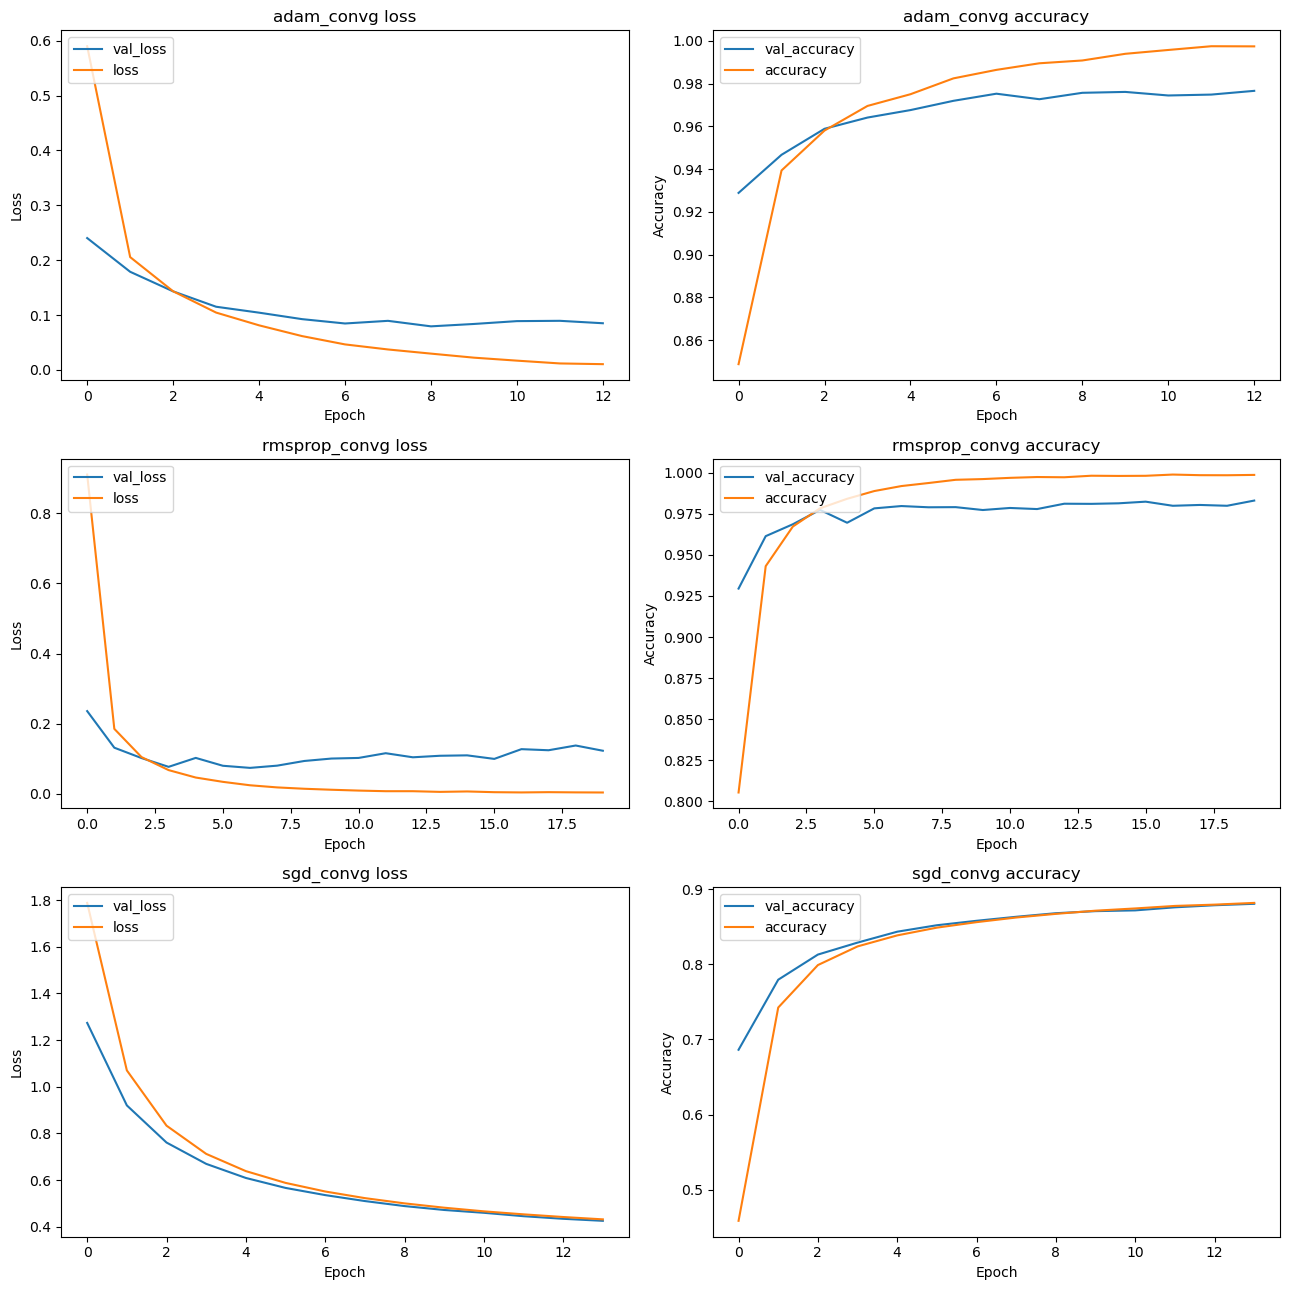

In [15]:
plot_train_results(models_convg_results)

In [16]:
for model in models_list:
    print(f"model {model.name} validation loss: {models_convg_results[model.name]['val_loss']}")
    print(f"model {model.name} validation accuracy: {models_convg_results[model.name]['val_accuracy']}")
    print('\n')

model adam_convg validation loss: 0.08512312173843384
model adam_convg validation accuracy: 0.9765833616256714


model rmsprop_convg validation loss: 0.12291974574327469
model rmsprop_convg validation accuracy: 0.9830833077430725


model sgd_convg validation loss: 0.425358384847641
model sgd_convg validation accuracy: 0.8804166913032532




The models improved performance after finding a suitable `batch size` number and using `early stop` to monitor `validation loss` when the metric stopped to improve (to avoid overfitting), which resulted in smoother `convergence` and less variability(less erratic curves).

Also, I had to slightly tune the `learning rate` of every model due to the other hyperparameter modifications.

Models with `Adam` and `RMSprop` optimizers continue having signs of `overfitting` due to the `validation loss` value being higher than the `training loss`. 

The model with `SGD` optimizer converges at a certain point and has no signs of `overfitting` but has the low accuracy of the models.

## Dropout Regularization:

### model dropout with 'adam' optimizer

In [229]:
earlystopping = EarlyStopping(monitor = "val_loss",
                                patience = 4,
                                mode = 'auto',
                                restore_best_weights = True,
                                verbose = 1)

adam_estimator = KerasClassifier(
    model,
    unitsHL1=750,
    unitsHL2=200,
    dropoutHL1 = 0,
    dropoutHL2 = 0,
    optimizer_learning_rate=0.0015,
    optimizer_momentum = 0.0,
    optimizer='Adam',
    callbacks=[earlystopping],
    epochs=30,
    batch_size=300,
)
adam_param_grid = {
    #'optimizer_learning_rate':[0.001,0.0015,0.002],
    #'batch_size':[200,300,400],
    'dropoutHL1':[0.6],
    'dropoutHL2':[0.3,0.4],
}
adam_grid = GridSearchCV(
    estimator=adam_estimator, 
    param_grid=adam_param_grid,
    cv=4, # cross-validation default 5-fold
)

In [230]:
with tf.device('GPU:0'):
    adam_grid_result = adam_grid.fit(
        X= X_train, 
        y= y_train,
        validation_data=(X_validation,y_validation),
        verbose=1,   
)

Epoch 1/30
120/120 [==============================] - 1s 8ms/step - loss: 0.8734 - accuracy: 0.7476 - val_loss: 0.2644 - val_accuracy: 0.9189
Epoch 2/30
120/120 [==============================] - 0s 4ms/step - loss: 0.3320 - accuracy: 0.8973 - val_loss: 0.1871 - val_accuracy: 0.9444
Epoch 3/30
120/120 [==============================] - 0s 4ms/step - loss: 0.2465 - accuracy: 0.9231 - val_loss: 0.1524 - val_accuracy: 0.9539
Epoch 4/30
120/120 [==============================] - 0s 4ms/step - loss: 0.2012 - accuracy: 0.9386 - val_loss: 0.1305 - val_accuracy: 0.9592
Epoch 5/30
120/120 [==============================] - 0s 4ms/step - loss: 0.1720 - accuracy: 0.9454 - val_loss: 0.1153 - val_accuracy: 0.9640
Epoch 6/30
120/120 [==============================] - 0s 4ms/step - loss: 0.1523 - accuracy: 0.9523 - val_loss: 0.1046 - val_accuracy: 0.9660
Epoch 7/30
120/120 [==============================] - 0s 4ms/step - loss: 0.1343 - accuracy: 0.9569 - val_loss: 0.0964 - val_accuracy: 0.9702
Epoch 

120/120 [==============================] - 0s 4ms/step - loss: 0.1437 - accuracy: 0.9552 - val_loss: 0.1023 - val_accuracy: 0.9680
Epoch 8/30
120/120 [==============================] - 0s 4ms/step - loss: 0.1306 - accuracy: 0.9597 - val_loss: 0.0927 - val_accuracy: 0.9697
Epoch 9/30
120/120 [==============================] - 0s 4ms/step - loss: 0.1175 - accuracy: 0.9632 - val_loss: 0.0896 - val_accuracy: 0.9714
Epoch 10/30
120/120 [==============================] - 0s 4ms/step - loss: 0.1092 - accuracy: 0.9654 - val_loss: 0.0892 - val_accuracy: 0.9716
Epoch 11/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0988 - accuracy: 0.9683 - val_loss: 0.0853 - val_accuracy: 0.9722
Epoch 12/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0992 - accuracy: 0.9688 - val_loss: 0.0789 - val_accuracy: 0.9753
Epoch 13/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9696 - val_loss: 0.0835 - val_accuracy: 0.9743
Epoch 14/30
1

160/160 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9727 - val_loss: 0.0752 - val_accuracy: 0.9781
Epoch 12/30
160/160 [==============================] - 1s 4ms/step - loss: 0.0777 - accuracy: 0.9756 - val_loss: 0.0783 - val_accuracy: 0.9760
Epoch 13/30
160/160 [==============================] - 1s 3ms/step - loss: 0.0751 - accuracy: 0.9764 - val_loss: 0.0754 - val_accuracy: 0.9774
Epoch 14/30
160/160 [==============================] - 1s 4ms/step - loss: 0.0729 - accuracy: 0.9761 - val_loss: 0.0696 - val_accuracy: 0.9795
Epoch 15/30
160/160 [==============================] - 1s 4ms/step - loss: 0.0691 - accuracy: 0.9780 - val_loss: 0.0684 - val_accuracy: 0.9798
Epoch 16/30
160/160 [==============================] - 1s 4ms/step - loss: 0.0637 - accuracy: 0.9787 - val_loss: 0.0697 - val_accuracy: 0.9797
Epoch 17/30
160/160 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9796 - val_loss: 0.0695 - val_accuracy: 0.9786
Epoch 18/30

In [242]:
print("Best score: %f using %s" % (adam_grid_result.best_score_, adam_grid_result.best_params_))

Best score: 0.978646 using {'dropoutHL1': 0.6, 'dropoutHL2': 0.3}


In [243]:
print("best estimator stopped epoch:",adam_grid_result.best_estimator_.current_epoch)

best estimator stopped epoch: 19


### model dropout with 'RMSprop' optimizer

In [20]:
earlystopping = EarlyStopping(monitor = "val_loss",
                                patience = 4,
                                mode = 'auto',
                                restore_best_weights = True,
                                verbose = 1)

rmsprop_estimator = KerasClassifier(
    model,
    unitsHL1=750,
    unitsHL2=200,
    dropoutHL1 = 0,
    dropoutHL2 = 0,
    optimizer_learning_rate=0.0015,
    optimizer_momentum = 0.0,
    optimizer='RMSprop',
    callbacks=[earlystopping],
    epochs=25,
    batch_size=400,
)
rmsprop_param_grid = {
    #'optimizer_learning_rate':[0.001,0.0015,0.002],
    #'batch_size':[300,400,500],
    'dropoutHL1':[0.5,0.6],
    'dropoutHL2':[0.0,0.1,0.2],
}
rmsprop_grid = GridSearchCV(
    estimator=rmsprop_estimator, 
    param_grid=rmsprop_param_grid,
    cv=4, # cross-validation default 5-fold
)

In [21]:
with tf.device('GPU:0'):
    rmsprop_grid_result = rmsprop_grid.fit(
        X= X_train, 
        y= y_train,
        validation_data=(X_validation,y_validation),
        verbose=1,   
)

Epoch 1/25
90/90 [==============================] - 1s 7ms/step - loss: 0.8391 - accuracy: 0.7699 - val_loss: 0.2821 - val_accuracy: 0.9139
Epoch 2/25
90/90 [==============================] - 0s 4ms/step - loss: 0.2945 - accuracy: 0.9093 - val_loss: 0.2097 - val_accuracy: 0.9367
Epoch 3/25
90/90 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.9324 - val_loss: 0.1653 - val_accuracy: 0.9509
Epoch 4/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1757 - accuracy: 0.9474 - val_loss: 0.1400 - val_accuracy: 0.9593
Epoch 5/25
90/90 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.9569 - val_loss: 0.1225 - val_accuracy: 0.9635
Epoch 6/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1205 - accuracy: 0.9633 - val_loss: 0.1104 - val_accuracy: 0.9667
Epoch 7/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1022 - accuracy: 0.9689 - val_loss: 0.0980 - val_accuracy: 0.9714
Epoch 8/25
90/90 [==

Epoch 8/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0984 - accuracy: 0.9695 - val_loss: 0.0953 - val_accuracy: 0.9705
Epoch 9/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0910 - accuracy: 0.9719 - val_loss: 0.0909 - val_accuracy: 0.9723
Epoch 10/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0779 - accuracy: 0.9747 - val_loss: 0.0873 - val_accuracy: 0.9731
Epoch 11/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0731 - accuracy: 0.9766 - val_loss: 0.0814 - val_accuracy: 0.9760
Epoch 12/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0643 - accuracy: 0.9793 - val_loss: 0.0787 - val_accuracy: 0.9774
Epoch 13/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0603 - accuracy: 0.9794 - val_loss: 0.0823 - val_accuracy: 0.9748
Epoch 14/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0566 - accuracy: 0.9816 - val_loss: 0.0807 - val_accuracy: 0.9761
Epoch 15/25
90/

Epoch 8/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1044 - accuracy: 0.9668 - val_loss: 0.1010 - val_accuracy: 0.9680
Epoch 9/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0961 - accuracy: 0.9690 - val_loss: 0.0918 - val_accuracy: 0.9707
Epoch 10/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 0.9731 - val_loss: 0.0889 - val_accuracy: 0.9728
Epoch 11/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9740 - val_loss: 0.0877 - val_accuracy: 0.9733
Epoch 12/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9764 - val_loss: 0.0806 - val_accuracy: 0.9759
Epoch 13/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.9787 - val_loss: 0.0818 - val_accuracy: 0.9762
Epoch 14/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0622 - accuracy: 0.9793 - val_loss: 0.0852 - val_accuracy: 0.9745
Epoch 15/25
90/

Epoch 4/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1885 - accuracy: 0.9434 - val_loss: 0.1468 - val_accuracy: 0.9572
Epoch 5/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1587 - accuracy: 0.9520 - val_loss: 0.1249 - val_accuracy: 0.9624
Epoch 6/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1363 - accuracy: 0.9587 - val_loss: 0.1141 - val_accuracy: 0.9665
Epoch 7/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1194 - accuracy: 0.9637 - val_loss: 0.1084 - val_accuracy: 0.9683
Epoch 8/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9666 - val_loss: 0.1023 - val_accuracy: 0.9686
Epoch 9/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1004 - accuracy: 0.9684 - val_loss: 0.0925 - val_accuracy: 0.9722
Epoch 10/25
90/90 [==============================] - 0s 4ms/step - loss: 0.0890 - accuracy: 0.9717 - val_loss: 0.0940 - val_accuracy: 0.9718
Epoch 11/25
90/90 [

90/90 [==============================] - 0s 4ms/step - loss: 0.2642 - accuracy: 0.9186 - val_loss: 0.1646 - val_accuracy: 0.9500
Epoch 4/25
90/90 [==============================] - 0s 4ms/step - loss: 0.2175 - accuracy: 0.9337 - val_loss: 0.1438 - val_accuracy: 0.9569
Epoch 5/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1816 - accuracy: 0.9444 - val_loss: 0.1254 - val_accuracy: 0.9623
Epoch 6/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1560 - accuracy: 0.9499 - val_loss: 0.1152 - val_accuracy: 0.9642
Epoch 7/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1394 - accuracy: 0.9563 - val_loss: 0.1101 - val_accuracy: 0.9660
Epoch 8/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1253 - accuracy: 0.9601 - val_loss: 0.0965 - val_accuracy: 0.9706
Epoch 9/25
90/90 [==============================] - 0s 4ms/step - loss: 0.1119 - accuracy: 0.9643 - val_loss: 0.0962 - val_accuracy: 0.9694
Epoch 10/25
90/90 [============

In [22]:
print("Best score: %f using %s" % (rmsprop_grid_result.best_score_, rmsprop_grid_result.best_params_))

Best score: 0.977354 using {'dropoutHL1': 0.5, 'dropoutHL2': 0.1}


In [23]:
print("best estimator stopped epoch:",rmsprop_grid_result.best_estimator_.current_epoch)

best estimator stopped epoch: 18


### model dropout with 'SGD' optimizer

In [16]:
earlystopping = EarlyStopping(monitor = "val_loss",
                                patience = 4,
                                mode = 'auto',
                                restore_best_weights = True,
                                verbose = 1)

sgd_estimator = KerasClassifier(
    model,
    unitsHL1=750,
    unitsHL2=200,
    dropoutHL1 = 0,
    dropoutHL2 = 0,
    optimizer_learning_rate=0.002,
    optimizer_momentum = 0.0,
    optimizer='SGD',
    callbacks=[earlystopping],
    epochs=25,
    batch_size=375,
)
sgd_param_grid = {
    #'optimizer_learning_rate':[0.001,0.0015,0.002],
    #'batch_size':[200,300,400],
    'dropoutHL1':[0.0,0.1,0,0.2],
    'dropoutHL2':[0.0,0.1,0.2],
}
sgd_grid = GridSearchCV(
    estimator=sgd_estimator, 
    param_grid=sgd_param_grid,
    cv=4, # cross-validation default 5-fold
)

In [17]:
with tf.device('GPU:0'):
    sgd_grid_result = sgd_grid.fit(
        X= X_train, 
        y= y_train,
        validation_data=(X_validation,y_validation),
        verbose=1,   
)

Epoch 1/25
96/96 [==============================] - 1s 6ms/step - loss: 0.8991 - accuracy: 0.7941 - val_loss: 0.2774 - val_accuracy: 0.9193
Epoch 2/25
96/96 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.9282 - val_loss: 0.2123 - val_accuracy: 0.9379
Epoch 3/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1783 - accuracy: 0.9478 - val_loss: 0.1732 - val_accuracy: 0.9513
Epoch 4/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1358 - accuracy: 0.9614 - val_loss: 0.1401 - val_accuracy: 0.9598
Epoch 5/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9712 - val_loss: 0.1215 - val_accuracy: 0.9640
Epoch 6/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9769 - val_loss: 0.1081 - val_accuracy: 0.9690
Epoch 7/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0632 - accuracy: 0.9817 - val_loss: 0.1059 - val_accuracy: 0.9673
Epoch 8/25
96/96 [==

Epoch 15/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9962 - val_loss: 0.0856 - val_accuracy: 0.9761
Epoch 16/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9974 - val_loss: 0.0850 - val_accuracy: 0.9768
Epoch 17/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 0.9973 - val_loss: 0.0902 - val_accuracy: 0.9742
Epoch 18/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.0933 - val_accuracy: 0.9762
Epoch 19/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9978 - val_loss: 0.0898 - val_accuracy: 0.9755
Epoch 20/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.0897 - val_accuracy: 0.9759
Epoch 20: early stopping
32/32 [==============================] - 0s 1ms/step
Epoch 1/25
96/96 [==============================] - 1s 7ms/step - loss: 0.84

96/96 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9693 - val_loss: 0.1201 - val_accuracy: 0.9646
Epoch 6/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0836 - accuracy: 0.9751 - val_loss: 0.1088 - val_accuracy: 0.9664
Epoch 7/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0665 - accuracy: 0.9809 - val_loss: 0.0977 - val_accuracy: 0.9705
Epoch 8/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0529 - accuracy: 0.9842 - val_loss: 0.0930 - val_accuracy: 0.9723
Epoch 9/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.9875 - val_loss: 0.0931 - val_accuracy: 0.9707
Epoch 10/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0367 - accuracy: 0.9895 - val_loss: 0.0936 - val_accuracy: 0.9726
Epoch 11/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.9920 - val_loss: 0.0899 - val_accuracy: 0.9744
Epoch 12/25
96/96 [==========

Epoch 14/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0826 - val_accuracy: 0.9766
Epoch 15/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.0821 - val_accuracy: 0.9775
Epoch 16/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0843 - val_accuracy: 0.9770
Epoch 16: early stopping
32/32 [==============================] - 0s 2ms/step
Epoch 1/25
96/96 [==============================] - 1s 6ms/step - loss: 0.9285 - accuracy: 0.7762 - val_loss: 0.2757 - val_accuracy: 0.9190
Epoch 2/25
96/96 [==============================] - 0s 4ms/step - loss: 0.2606 - accuracy: 0.9216 - val_loss: 0.2002 - val_accuracy: 0.9409
Epoch 3/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1894 - accuracy: 0.9439 - val_loss: 0.1591 - val_accuracy: 0.9543
Epoch 4/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1465 

96/96 [==============================] - 0s 4ms/step - loss: 0.2033 - accuracy: 0.9396 - val_loss: 0.1601 - val_accuracy: 0.9523
Epoch 4/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1581 - accuracy: 0.9531 - val_loss: 0.1291 - val_accuracy: 0.9615
Epoch 5/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9621 - val_loss: 0.1175 - val_accuracy: 0.9634
Epoch 6/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1051 - accuracy: 0.9681 - val_loss: 0.1010 - val_accuracy: 0.9679
Epoch 7/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0849 - accuracy: 0.9736 - val_loss: 0.0911 - val_accuracy: 0.9722
Epoch 8/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0675 - accuracy: 0.9788 - val_loss: 0.0852 - val_accuracy: 0.9734
Epoch 9/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9826 - val_loss: 0.0919 - val_accuracy: 0.9714
Epoch 10/25
96/96 [============

Epoch 4/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1497 - accuracy: 0.9544 - val_loss: 0.1375 - val_accuracy: 0.9575
Epoch 5/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1212 - accuracy: 0.9632 - val_loss: 0.1127 - val_accuracy: 0.9668
Epoch 6/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0974 - accuracy: 0.9711 - val_loss: 0.1020 - val_accuracy: 0.9689
Epoch 7/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0782 - accuracy: 0.9759 - val_loss: 0.0979 - val_accuracy: 0.9703
Epoch 8/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9806 - val_loss: 0.0922 - val_accuracy: 0.9713
Epoch 9/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0862 - val_accuracy: 0.9723
Epoch 10/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9851 - val_loss: 0.0934 - val_accuracy: 0.9724
Epoch 11/25
96/96 [

96/96 [==============================] - 1s 7ms/step - loss: 0.8462 - accuracy: 0.7931 - val_loss: 0.2696 - val_accuracy: 0.9211
Epoch 2/25
96/96 [==============================] - 0s 4ms/step - loss: 0.2516 - accuracy: 0.9237 - val_loss: 0.2109 - val_accuracy: 0.9371
Epoch 3/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1856 - accuracy: 0.9449 - val_loss: 0.1672 - val_accuracy: 0.9507
Epoch 4/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1438 - accuracy: 0.9566 - val_loss: 0.1381 - val_accuracy: 0.9590
Epoch 5/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1142 - accuracy: 0.9656 - val_loss: 0.1199 - val_accuracy: 0.9647
Epoch 6/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0906 - accuracy: 0.9727 - val_loss: 0.1059 - val_accuracy: 0.9688
Epoch 7/25
96/96 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.1000 - val_accuracy: 0.9697
Epoch 8/25
96/96 [=============

Epoch 3/25
96/96 [==============================] - 0s 3ms/step - loss: 0.1898 - accuracy: 0.9433 - val_loss: 0.1594 - val_accuracy: 0.9546
Epoch 4/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1489 - accuracy: 0.9556 - val_loss: 0.1337 - val_accuracy: 0.9597
Epoch 5/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1172 - accuracy: 0.9646 - val_loss: 0.1132 - val_accuracy: 0.9663
Epoch 6/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0935 - accuracy: 0.9718 - val_loss: 0.1061 - val_accuracy: 0.9680
Epoch 7/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.9765 - val_loss: 0.0979 - val_accuracy: 0.9691
Epoch 8/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9815 - val_loss: 0.0903 - val_accuracy: 0.9717
Epoch 9/25
96/96 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0925 - val_accuracy: 0.9720
Epoch 10/25
96/96 [=

96/96 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.9259 - val_loss: 0.2015 - val_accuracy: 0.9420
Epoch 3/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1772 - accuracy: 0.9476 - val_loss: 0.1585 - val_accuracy: 0.9540
Epoch 4/25
96/96 [==============================] - 0s 4ms/step - loss: 0.1372 - accuracy: 0.9599 - val_loss: 0.1390 - val_accuracy: 0.9600
Epoch 5/25
96/96 [==============================] - 0s 3ms/step - loss: 0.1108 - accuracy: 0.9671 - val_loss: 0.1149 - val_accuracy: 0.9656
Epoch 6/25
96/96 [==============================] - 0s 3ms/step - loss: 0.0902 - accuracy: 0.9742 - val_loss: 0.1038 - val_accuracy: 0.9691
Epoch 7/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0727 - accuracy: 0.9789 - val_loss: 0.0968 - val_accuracy: 0.9716
Epoch 8/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0584 - accuracy: 0.9822 - val_loss: 0.0909 - val_accuracy: 0.9728
Epoch 9/25
96/96 [=============

Epoch 10/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.9848 - val_loss: 0.0860 - val_accuracy: 0.9732
Epoch 11/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0405 - accuracy: 0.9869 - val_loss: 0.0809 - val_accuracy: 0.9756
Epoch 12/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0842 - val_accuracy: 0.9760
Epoch 13/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0895 - val_accuracy: 0.9743
Epoch 14/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9909 - val_loss: 0.0866 - val_accuracy: 0.9745
Epoch 15/25
96/96 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0822 - val_accuracy: 0.9771
Epoch 15: early stopping
32/32 [==============================] - 0s 2ms/step
Epoch 1/25
96/96 [==============================] - 1s 6ms/step - loss: 0.88

In [18]:
print("Best score: %f using %s" % (sgd_grid_result.best_score_, sgd_grid_result.best_params_))

Best score: 0.975833 using {'dropoutHL1': 0.1, 'dropoutHL2': 0.2}


In [19]:
print("best estimator stopped epoch:",sgd_grid_result.best_estimator_.current_epoch)

best estimator stopped epoch: 13


### models regularization dropout results

In [12]:
# training regularization results

# model dropout with optimizer adam
adam_model_dropout = model(
    unitsHL1 = 750, 
    unitsHL2 = 200, 
    dropoutHL1 = 0.6,
    dropoutHL2 = 0.3, 
    optimizer_learning_rate = 0.0015, 
    optimizer_momentum = 0.0,
    optimizer ='Adam',
)
adam_model_dropout._name = 'adam_dropout'

# model dropout with optimizer RMSprop
rmsprop_model_dropout = model(
    unitsHL1 = 750, 
    unitsHL2 = 200, 
    dropoutHL1 = 0.5,
    dropoutHL2 = 0.1, 
    optimizer_learning_rate = 0.0015, 
    optimizer_momentum = 0.0,
    optimizer ='RMSprop',
)
rmsprop_model_dropout._name = 'rmsprop_dropout'

# model dropout with optimizer SGD
sgd_model_dropout = model(
    unitsHL1 = 750, 
    unitsHL2 = 400, 
    dropoutHL1 = 0.1,
    dropoutHL2 = 0.2, 
    optimizer_learning_rate = 0.0020, 
    optimizer_momentum = 0.0,
    optimizer ='SGD',
)
sgd_model_dropout._name = 'sgd_dropout'


# models list
models_list = [adam_model_dropout,rmsprop_model_dropout,sgd_model_dropout]
# epochs list in order: [adam,rmsprop,sgd]
models_epochs_list = [19,18,13]
# batch size list in order: [adam,rmsprop,sgd]
models_batch_size_list = [300,400,375]

In [13]:
models_dropout_results = model_train_results(
    models = models_list,
    epochs = models_epochs_list,
    batch_size = models_batch_size_list,
    X = X_train,
    Y = y_train,
    X_val = X_test,
    Y_val = y_test,
    callbacks=None,
    verbose = 1
) 

Epoch 1/19
160/160 [==============================] - 1s 6ms/step - loss: 0.7372 - accuracy: 0.7836 - val_loss: 0.2295 - val_accuracy: 0.9307
Epoch 2/19
160/160 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.9126 - val_loss: 0.1670 - val_accuracy: 0.9495
Epoch 3/19
160/160 [==============================] - 1s 3ms/step - loss: 0.2120 - accuracy: 0.9350 - val_loss: 0.1292 - val_accuracy: 0.9586
Epoch 4/19
160/160 [==============================] - 1s 3ms/step - loss: 0.1728 - accuracy: 0.9463 - val_loss: 0.1111 - val_accuracy: 0.9646
Epoch 5/19
160/160 [==============================] - 1s 3ms/step - loss: 0.1515 - accuracy: 0.9528 - val_loss: 0.0989 - val_accuracy: 0.9699
Epoch 6/19
160/160 [==============================] - 1s 3ms/step - loss: 0.1297 - accuracy: 0.9600 - val_loss: 0.0929 - val_accuracy: 0.9720
Epoch 7/19
160/160 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9646 - val_loss: 0.0894 - val_accuracy: 0.9727
Epoch 

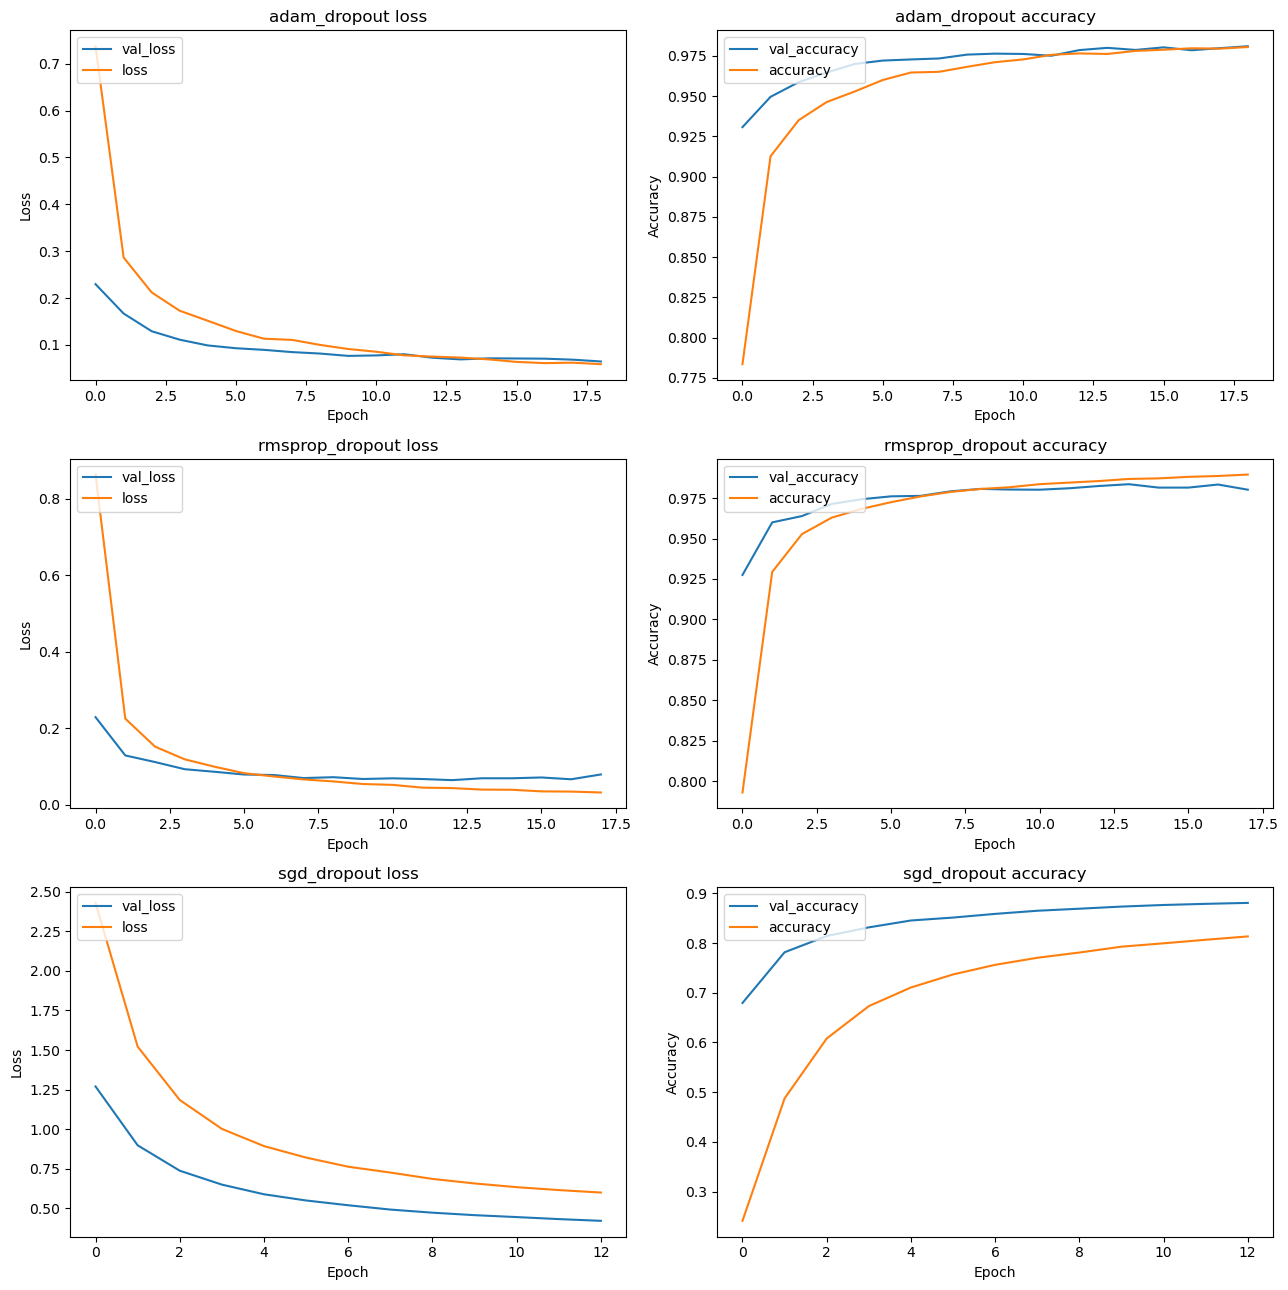

In [14]:
plot_train_results(models_dropout_results)

In [17]:
for model in models_list:
    print("model:",model.name)
    print(f"model {model.name} validation loss: {models_dropout_results[model.name]['val_loss']}")
    print(f"model {model.name} validation accuracy: {models_dropout_results[model.name]['val_accuracy']}")
    print(f"model {model.name} stop epoch: {models_dropout_results[model.name]['stop epochs']}")
    print('\n')

model: adam_dropout
model adam_dropout validation loss: 0.06463388353586197
model adam_dropout validation accuracy: 0.98089998960495
model adam_dropout stop epoch: 19


model: rmsprop_dropout
model rmsprop_dropout validation loss: 0.07919890433549881
model rmsprop_dropout validation accuracy: 0.9801999926567078
model rmsprop_dropout stop epoch: 18


model: sgd_dropout
model sgd_dropout validation loss: 0.42107391357421875
model sgd_dropout validation accuracy: 0.8808000087738037
model sgd_dropout stop epoch: 13




`Dropout` regularization helps the models to avoid `overfitting` and reach a `convergence` point, the models perform well on the training and the validation data 

# 6. Training 

In [16]:
# checkpointer file
checkpointer_adam = ModelCheckpoint(
    filepath='mnist_adam.best.hdf5', 
    save_best_only=True,
)

checkpointer_rmsprop = ModelCheckpoint(
    filepath='mnist_rmsprop.best.hdf5', 
    save_best_only=True,
)

checkpointer_sgd = ModelCheckpoint(
    filepath='mnist_sgd.best.hdf5', 
    save_best_only=True,
)

In [19]:
# model with adam optimizer
hist_adam = adam_model_dropout.fit(X_train, y_train, batch_size=300, epochs=19,
          validation_split=0.2, callbacks=[checkpointer_adam],
          verbose=1, shuffle=True)

Epoch 1/19
128/128 [==============================] - 1s 8ms/step - loss: 0.0538 - accuracy: 0.9828 - val_loss: 0.0171 - val_accuracy: 0.9947
Epoch 2/19
128/128 [==============================] - 1s 4ms/step - loss: 0.0534 - accuracy: 0.9828 - val_loss: 0.0191 - val_accuracy: 0.9947
Epoch 3/19
128/128 [==============================] - 1s 4ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0189 - val_accuracy: 0.9940
Epoch 4/19
128/128 [==============================] - 1s 4ms/step - loss: 0.0471 - accuracy: 0.9843 - val_loss: 0.0189 - val_accuracy: 0.9946
Epoch 5/19
128/128 [==============================] - 1s 5ms/step - loss: 0.0471 - accuracy: 0.9840 - val_loss: 0.0220 - val_accuracy: 0.9932
Epoch 6/19
128/128 [==============================] - 1s 4ms/step - loss: 0.0447 - accuracy: 0.9853 - val_loss: 0.0199 - val_accuracy: 0.9939
Epoch 7/19
128/128 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9855 - val_loss: 0.0238 - val_accuracy: 0.9914
Epoch 

In [20]:
# model with rmsprop optimizer
hist_rmsprop = rmsprop_model_dropout.fit(X_train, y_train, batch_size=400, epochs=18,
          validation_split=0.2, callbacks=[checkpointer_rmsprop],
          verbose=1, shuffle=True)

Epoch 1/18
96/96 [==============================] - 1s 9ms/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0073 - val_accuracy: 0.9976
Epoch 2/18
96/96 [==============================] - 0s 5ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0113 - val_accuracy: 0.9966
Epoch 3/18
96/96 [==============================] - 1s 5ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0132 - val_accuracy: 0.9952
Epoch 4/18
96/96 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9912 - val_loss: 0.0108 - val_accuracy: 0.9955
Epoch 5/18
96/96 [==============================] - 1s 5ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0126 - val_accuracy: 0.9960
Epoch 6/18
96/96 [==============================] - 1s 6ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0134 - val_accuracy: 0.9954
Epoch 7/18
96/96 [==============================] - 1s 5ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0146 - val_accuracy: 0.9954
Epoch 8/18
96/96 [==

In [21]:
# model with sgd optimizer
hist_sgd = sgd_model_dropout.fit(X_train, y_train, batch_size=375, epochs=13,
          validation_split=0.2, callbacks=[checkpointer_sgd],
          verbose=1, shuffle=True)

Epoch 1/13
103/103 [==============================] - 1s 9ms/step - loss: 0.5865 - accuracy: 0.8188 - val_loss: 0.4324 - val_accuracy: 0.8747
Epoch 2/13
103/103 [==============================] - 1s 7ms/step - loss: 0.5744 - accuracy: 0.8191 - val_loss: 0.4271 - val_accuracy: 0.8764
Epoch 3/13
103/103 [==============================] - 1s 5ms/step - loss: 0.5624 - accuracy: 0.8233 - val_loss: 0.4201 - val_accuracy: 0.8786
Epoch 4/13
103/103 [==============================] - 1s 5ms/step - loss: 0.5555 - accuracy: 0.8276 - val_loss: 0.4160 - val_accuracy: 0.8798
Epoch 5/13
103/103 [==============================] - 1s 6ms/step - loss: 0.5448 - accuracy: 0.8317 - val_loss: 0.4100 - val_accuracy: 0.8805
Epoch 6/13
103/103 [==============================] - 1s 7ms/step - loss: 0.5353 - accuracy: 0.8339 - val_loss: 0.4069 - val_accuracy: 0.8818
Epoch 7/13
103/103 [==============================] - 1s 6ms/step - loss: 0.5253 - accuracy: 0.8375 - val_loss: 0.4003 - val_accuracy: 0.8839
Epoch 

# 7. Predictions

### Predictions on test set

In [13]:
# load the weights that yielded the best validation accuracy
adam_model_dropout.load_weights('mnist_adam.best.hdf5')
rmsprop_model_dropout.load_weights('mnist_rmsprop.best.hdf5')
sgd_model_dropout.load_weights('mnist_sgd.best.hdf5')

In [14]:
# evaluate test accuracy
adam_score = adam_model_dropout.evaluate(X_test,y_test,verbose=0)
rmsprop_score = rmsprop_model_dropout.evaluate(X_test,y_test,verbose=0)
sgd_score= sgd_model_dropout.evaluate(X_test,y_test,verbose=0)

In [15]:
adam_test_accuracy = 100*adam_score[1]
adam_test_loss = adam_score[0]

rmsprop_test_accuracy = 100*rmsprop_score[1]
rmsprop_test_loss = rmsprop_score[0]

sgd_test_accuracy = 100*sgd_score[1]
sgd_test_loss = sgd_score[0]

In [16]:
print("adam model test accuracy:",adam_test_accuracy)
print("rmsprop model test accuracy:",rmsprop_test_accuracy)
print("sgd model test accuracy:",sgd_test_accuracy)

adam model test accuracy: 97.96000123023987
rmsprop model test accuracy: 98.36999773979187
sgd model test accuracy: 89.56000208854675


### prediction on custom data

Images saved in `new_digits` folder have a length of 20 instances(`RGB` images of `32x32` pixels) and are labeled with the corresponding digit.

In [21]:
from DigitsPreprocessing import custom_dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# convert custom images into a set for the MLP model
folder_path = 'new_digits'
custom_set, custom_labels = custom_dataset(folder_path)
# preprocess custom set and labels
custom_set = np.reshape(custom_set,(len(custom_set),28,28))
custom_set = custom_set/255
categorical_labels = to_categorical(custom_labels,10)


In [32]:
# open a raw image
import cv2
raw_image_path = 'new_digits/0.png'
img = cv2.imread(raw_image_path)
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

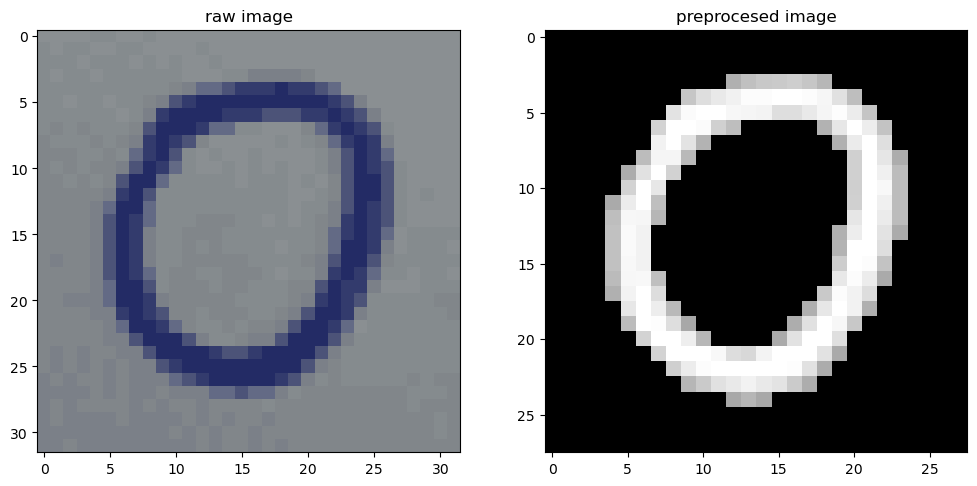

In [34]:
# plot raw and preprocessed image
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,2,1) 
bx = fig.add_subplot(1,2,2) 

ax.imshow(imgRGB)
ax.set_title("raw image")

bx.imshow(custom_set[0],cmap='gray')
bx.set_title("preprocesed image")

plt.show()

In [23]:
# evaluate accuracy of the model with the custom set
rmsprop_custom_score = rmsprop_model_dropout.evaluate(custom_set,categorical_labels,verbose=0)
print("accuracy prediction on custom set:",100*rmsprop_custom_score[1])

accuracy prediction on custom set: 80.0000011920929


In [36]:
# predictions as single digits
predicted_labels=[]
predictions = rmsprop_model_dropout.predict(custom_set)
for prediction in predictions:
    # from categorical to single digit
    predicted_labels.append(list(prediction).index(max(list(prediction))))

1/1 [==============================] - 0s 90ms/step


In [37]:
print("original digits:",custom_labels)
print("predicted digits:",predicted_labels)

original digits: [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]
predicted digits: [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 2, 5, 8, 5, 9]


We can see that the MLP model with the `RMSprop` optimizer is the model with the highest accuracy, around  98.37%. The model performance decreases accuracy when we try to make predictions with other images that don't belong to the original dataset. The accuracy with a custom dataset was 80% (4 of the 20 images were misclassified).